# Exploring Twitter Data to Understand Communities: Clustering, Key-word Analysis & Sentiment Analysis

Disclaimer - Since K-means clustering chooses initial centroids randomly the clusters formed will change a little bit everytime we run the code. Hence, the results and the visualization changes cluster to cluster everytime we try to reproduce the results.

Needless to say, the results are almost consistent everytime in all the clusters.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Folder Link: https://drive.google.com/drive/folders/1zoK5Lo0JRDv8UvIgp0u5Da9bhMojBQKN?usp=sharing

Create a shortcut for thhis shared folder in your drive and run as ifthe folder exist in your drve.

# Import all the packages

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from collections import OrderedDict
import operator
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import silhouette_visualizer
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import seaborn as sns

# Install all the needed dependencies

In [ ]:
# Run this code to see LDA visualization
!pip install pyLDAvis
!pip install "pandas<2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)

words = set(nltk.corpus.words.words())
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon
from folium.plugins import MarkerCluster
import folium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
import os

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install vaderSentiment
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install afinn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=d643812531e11f3797e8005847cf27f6d90a7d0ecf3f25f66689845c10f67a33
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from afinn import Afinn


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#install sumy for summarization
!pip install sumy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21709 sha256=e165642a44684a1c46b61d01cee00693e3052ba0fef8c4715b713c8d9cf5f8ff
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=c96c080eef3cb8de90a47405828eac35a872c04b9718f1ed644a3b19a13cd055
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506

In [ ]:
os.chdir("/content/drive/MyDrive/OldData/")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: ignored

# TECHNOLOGY COMMUNITY

## Read the data from CSV file

In [ ]:
tech_us_df = pd.read_csv("/content/sample_data/techus_csv.csv")
data = pd.read_csv("/content/sample_data/techus_csv.csv")
#tech_us_df = pd.read_csv("techus_csv.csv")
#data = pd.read_csv("techus_csv.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#tech_us_df.head()
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


user           location  \
0  NASALaserComm      Greenbelt, MD   
1   turntidetech      Sunnyvale, CA   
2       TRUEUP90      Royal Oak, MI   
3   Parents_Nook  San Francisco, CA   
4    BlakeBeilue         Denver, CO   

                                               tweet  
0  We're also at #AGU2021, representing @NASASCaN...  
1  When your technology can transform both busine...  
2  @elonmusk Will you send me a Tesla in exchange...  
3  And the best part is working on a deep problem...  
4  @daheels1 @therealdre_jack @HelmanDC Unless th...

# DATA CLEANING

## Defining a custom stopwords list for futher cleaning of tweets

In [ ]:

long_stopwords_list=["a",
"able",
"about",
"above",
"abst",
"accordance",
"according",
"accordingly",
"across",
"act",
"actually",
"added",
"adj",
"affected",
"affecting",
"affects",
"after",
"afterwards",
"again",
"against",
"ah",
"all",
"almost",
"alone",
"along",
"already",
"also",
"although",
"always",
"am",
"among",
"amongst",
"an",
"and",
"announce",
"another",
"any",
"anybody",
"anyhow",
"anymore",
"anyone",
"anything",
"anyway",
"anyways",
"anywhere",
"apparently",
"approximately",
"are",
"aren",
"arent",
"arise",
"around",
"as",
"aside",
"ask",
"asking",
"at",
"auth",
"available",
"away",
"awfully",
"b",
"back",
"be",
"became",
"because",
"become",
"becomes",
"becoming",
"been",
"before",
"beforehand",
"begin",
"beginning",
"beginnings",
"begins",
"behind",
"being",
"believe",
"below",
"beside",
"besides",
"between",
"beyond",
"biol",
"both",
"brief",
"briefly",
"but",
"by",
"c",
"ca",
"came",
"can",
"cannot",
"can't",
"cause",
"causes",
"certain",
"certainly",
"co",
"com",
"come",
"comes",
"contain",
"containing",
"contains",
"could",
"couldnt",
"d",
"date",
"did",
"didn't",
"different",
"do",
"does",
"doesn't",
"doing",
"done",
"don't",
"down",
"downwards",
"due",
"during",
"e",
"each",
"ed",
"edu",
"effect",
"eg",
"eight",
"eighty",
"either",
"else",
"elsewhere",
"end",
"ending",
"enough",
"especially",
"et",
"et-al",
"etc",
"even",
"ever",
"every",
"everybody",
"everyone",
"everything",
"everywhere",
"ex",
"except",
"f",
"far",
"few",
"ff",
"fifth",
"first",
"five",
"fix",
"followed",
"following",
"follows",
"for",
"former",
"formerly",
"forth",
"found",
"four",
"from",
"further",
"furthermore",
"g",
"gave",
"get",
"gets",
"getting",
"give",
"given",
"gives",
"giving",
"go",
"goes",
"gone",
"got",
"gotten",
"h",
"had",
"happens",
"hardly",
"has",
"hasn't",
"have",
"haven't",
"having",
"he",
"hed",
"hence",
"her",
"here",
"hereafter",
"hereby",
"herein",
"heres",
"hereupon",
"hers",
"herself",
"hes",
"hi",
"hid",
"him",
"himself",
"his",
"hither",
"home",
"how",
"howbeit",
"however",
"hundred",
"i",
"id",
"ie",
"if",
"i'll",
"im",
"immediate",
"immediately",
"importance",
"important",
"in",
"inc",
"indeed",
"index",
"information",
"instead",
"into",
"invention",
"inward",
"is",
"isn't",
"it",
"itd",
"it'll",
"its",
"itself",
"i've",
"j",
"just",
"k",
"keep	",
"keeps",
"kept",
"kg",
"km",
"know",
"known",
"knows",
"l",
"largely",
"last",
"lately",
"later",
"latter",
"latterly",
"least",
"less",
"lest",
"let",
"lets",
"like",
"liked",
"likely",
"line",
"little",
"'ll",
"look",
"looking",
"looks",
"ltd",
"m",
"made",
"mainly",
"make",
"makes",
"many",
"may",
"maybe",
"me",
"mean",
"means",
"meantime",
"meanwhile",
"merely",
"mg",
"might",
"million",
"miss",
"ml",
"more",
"moreover",
"most",
"mostly",
"mr",
"mrs",
"much",
"mug",
"must",
"my",
"myself",
"n",
"na",
"name",
"namely",
"nay",
"nd",
"near",
"nearly",
"necessarily",
"necessary",
"need",
"needs",
"neither",
"never",
"nevertheless",
"new",
"next",
"nine",
"ninety",
"no",
"nobody",
"non",
"none",
"nonetheless",
"noone",
"nor",
"normally",
"nos",
"not",
"noted",
"nothing",
"now",
"nowhere",
"o",
"obtain",
"obtained",
"obviously",
"of",
"off",
"often",
"oh",
"ok",
"okay",
"old",
"omitted",
"on",
"once",
"one",
"ones",
"only",
"onto",
"or",
"ord",
"other",
"others",
"otherwise",
"ought",
"our",
"ours",
"ourselves",
"out",
"outside",
"over",
"overall",
"owing",
"own",
"p",
"page",
"pages",
"part",
"particular",
"particularly",
"past",
"per",
"perhaps",
"placed",
"please",
"plus",
"poorly",
"possible",
"possibly",
"potentially",
"pp",
"predominantly",
"present",
"previously",
"primarily",
"probably",
"promptly",
"proud",
"provides",
"put",
"q",
"que",
"quickly",
"quite",
"qv",
"r",
"ran",
"rather",
"rd",
"re",
"readily",
"really",
"recent",
"recently",
"ref",
"refs",
"regarding",
"regardless",
"regards",
"related",
"relatively",
"research",
"respectively",
"resulted",
"resulting",
"results",
"right",
"run",
"s",
"said",
"same",
"saw",
"say",
"saying",
"says",
"sec",
"section",
"see",
"seeing",
"seem",
"seemed",
"seeming",
"seems",
"seen",
"self",
"selves",
"sent",
"seven",
"several",
"shall",
"she",
"shed",
"she'll",
"shes",
"should",
"shouldn't",
"show",
"showed",
"shown",
"showns",
"shows",
"significant",
"significantly",
"similar",
"similarly",
"since",
"six",
"slightly",
"so",
"some",
"somebody",
"somehow",
"someone",
"somethan",
"something",
"sometime",
"sometimes",
"somewhat",
"somewhere",
"soon",
"sorry",
"specifically",
"specified",
"specify",
"specifying",
"still",
"stop",
"strongly",
"sub",
"substantially",
"successfully",
"such",
"sufficiently",
"suggest",
"sup",
"sure	",
"take",
"taken",
"taking",
"tell",
"tends",
"th",
"than",
"thank",
"thanks",
"thanx",
"that",
"that'll",
"thats",
"that've",
"the",
"their",
"theirs",
"them",
"themselves",
"then",
"thence",
"there",
"thereafter",
"thereby",
"thered",
"therefore",
"therein",
"there'll",
"thereof",
"therere",
"theres",
"thereto",
"thereupon",
"there've",
"these",
"they",
"theyd",
"they'll",
"theyre",
"they've",
"think",
"this",
"those",
"thou",
"though",
"thoughh",
"thousand",
"throug",
"through",
"throughout",
"thru",
"thus",
"til",
"tip",
"to",
"together",
"too",
"took",
"toward",
"towards",
"tried",
"tries",
"truly",
"try",
"trying",
"ts",
"twice",
"two",
"u",
"un",
"under",
"unfortunately",
"unless",
"unlike",
"unlikely",
"until",
"unto",
"up",
"upon",
"ups",
"us",
"use",
"used",
"useful",
"usefully",
"usefulness",
"uses",
"using",
"usually",
"v",
"value",
"various",
"'ve",
"very",
"via",
"viz",
"vol",
"vols",
"vs",
"w",
"want",
"wants",
"was",
"wasnt",
"way",
"we",
"wed",
"welcome",
"we'll",
"went",
"were",
"werent",
"we've",
"what",
"whatever",
"what'll",
"whats",
"when",
"whence",
"whenever",
"where",
"whereafter",
"whereas",
"whereby",
"wherein",
"wheres",
"whereupon",
"wherever",
"whether",
"which",
"while",
"whim",
"whither",
"who",
"whod",
"whoever",
"whole",
"who'll",
"whom",
"whomever",
"whos",
"whose",
"why",
"widely",
"willing",
"wish",
"with",
"within",
"without",
"wont",
"words",
"world",
"would",
"wouldnt",
"www",
"x",
"y",
"yes",
"yet",
"you",
"youd",
"you'll",
"your",
"youre",
"yours",
"yourself",
"yourselves",
"you've",
"z",
"zero","amp","lot","technology","tech"]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data cleaning with all the required essential functions

In [ ]:
import re
from nltk.corpus import stopwords
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

def remove_stopwords2(text):
    text = ' '.join([word for word in text.split() if word not in (long_stopwords_list)])
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    lemmatized_tweet = ' '.join(lemmatized_words)
    return lemmatized_tweet


# Apply functions on tweets
data['tweet'] = data['tweet'].apply(lambda x : remove_username(x))
data['tweet'] = data['tweet'].apply(lambda x : remove_url(x))
data['tweet'] = data['tweet'].apply(lambda x : remove_emoji(x))
data['tweet'] = data['tweet'].apply(lambda x : decontraction(x))
data['tweet'] = data['tweet'].apply(lambda x : seperate_alphanumeric(x))
data['tweet'] = data['tweet'].apply(lambda x : unique_char(cont_rep_char,x))
data['tweet'] = data['tweet'].apply(lambda x : char(x))
data['tweet'] = data['tweet'].apply(lambda x : x.lower())
data['tweet'] = data['tweet'].apply(lambda x : lemmatize_word(x))
data['tweet'] = data['tweet'].apply(lambda x : remove_stopwords(x))
data['tweet'] = data['tweet'].apply(lambda x : remove_stopwords2(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:25: DeprecationWarning: invalid escape sequence '\s'
<>:25: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-16-3b6d351628ca>:25: DeprecationWarning: invalid escape sequence '\s'
  return re.sub('@[^\s]+','',text)


In [ ]:
data['tweet']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       agu represent share benefit laser communicatio...
1       transform business fight climate change tend n...
2          send tesla exchange theory travel interstellar
3       best work deep problem satisfy ignore communit...
4       substitute type android real dak play week adv...
                              ...                        
1675                   aim hose vent computer case unplug
1676           idea trip bring work computer sound ghetto
1677    soo mini super computer tangible half worlds p...
1678    computer screen forward conversations synuclei...
1679    reach help restart computer allow device lock ...
Name: tweet, Length: 1680, dtype: object

In [ ]:
data['tokenized_sents'] = data.apply(lambda data: nltk.word_tokenize(data['tweet']), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Tokenized cleaned words

In [ ]:
data['tokenized_sents']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       [agu, represent, share, benefit, laser, commun...
1       [transform, business, fight, climate, change, ...
2       [send, tesla, exchange, theory, travel, inters...
3       [best, work, deep, problem, satisfy, ignore, c...
4       [substitute, type, android, real, dak, play, w...
                              ...                        
1675            [aim, hose, vent, computer, case, unplug]
1676    [idea, trip, bring, work, computer, sound, ghe...
1677    [soo, mini, super, computer, tangible, half, w...
1678    [computer, screen, forward, conversations, syn...
1679    [reach, help, restart, computer, allow, device...
Name: tokenized_sents, Length: 1680, dtype: object

In [ ]:
master_text = [item for sublist in data['tokenized_sents'].to_list() for item in sublist]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dictW = {}
def uniqueL(word):
    if word in dictW:
        dictW[words] += 1
    else:
        dictW.update({words: 1})

for words in master_text:
        uniqueL(words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(dictW)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6031

In [ ]:
sorted_items = sorted(dictW.items(), key=operator.itemgetter(1), reverse=True)

freq__dictW = OrderedDict()
for k, v in sorted_items:
    freq__dictW[k] = v

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Processing the top words for further processing

In [ ]:
top_words = []
counter = 0
for key,value in freq__dictW.items():
    top_words.append(key)
    counter += 1
    if counter == 1000:
        break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Vectorizing the tweets with respect to the top words

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=200000)
tfidf_vectorizer.fit(top_words)
tfidf_matrix =tfidf_vectorizer.transform(data.tweet)

feature_names = tfidf_vectorizer.get_feature_names_out()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(feature_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000

In [ ]:
tfidf_matrix.toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_matrix.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1680, 1000)

## These are the vectorized tweets




In [ ]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index = data.user)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


abc  ability  absolutely  academy  access  accessible  accord  \
user                                                                            
NASALaserComm   0.0      0.0         0.0      0.0     0.0         0.0     0.0   
turntidetech    0.0      0.0         0.0      0.0     0.0         0.0     0.0   
TRUEUP90        0.0      0.0         0.0      0.0     0.0         0.0     0.0   
Parents_Nook    0.0      0.0         0.0      0.0     0.0         0.0     0.0   
BlakeBeilue     0.0      0.0         0.0      0.0     0.0         0.0     0.0   
...             ...      ...         ...      ...     ...         ...     ...   
aerohistorian   0.0      0.0         0.0      0.0     0.0         0.0     0.0   
N8Talk          0.0      0.0         0.0      0.0     0.0         0.0     0.0   
joshhwesterman  0.0      0.0         0.0      0.0     0.0         0.0     0.0   
LuisM_Oliveira  0.0      0.0         0.0      0.0     0.0         0.0     0.0   
AppleSupport    0.0      0.0         0.0      0.0     0.0         0.0     0.0   

                 account  action  actual  ...  worth  wow  wrap  write  wrong  \
user                                      ...                                   
NASALaserComm   0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
turntidetech    0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
TRUEUP90        0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
Parents_Nook    0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
BlakeBeilue     0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
...                  ...     ...     ...  ...    ...  ...   ...    ...    ...   
aerohistorian   0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
N8Talk          0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
joshhwesterman  0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
LuisM_Oliveira  0.000000     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   
AppleSupport    0.235702     0.0     0.0  ...    0.0  0.0   0.0    0.0    0.0   

                yeah  year  years  yellow  york  
user                                             
NASALaserComm    0.0   0.0    0.0     0.0   0.0  
turntidetech     0.0   0.0    0.0     0.0   0.0  
TRUEUP90         0.0   0.0    0.0     0.0   0.0  
Parents_Nook     0.0   0.0    0.0     0.0   0.0  
BlakeBeilue      0.0   0.0    0.0     0.0   0.0  
...              ...   ...    ...     ...   ...  
aerohistorian    0.0   0.0    0.0     0.0   0.0  
N8Talk           0.0   0.0    0.0     0.0   0.0  
joshhwesterman   0.0   0.0    0.0     0.0   0.0  
LuisM_Oliveira   0.0   0.0    0.0     0.0   0.0  
AppleSupport     0.0   0.0    0.0     0.0   0.0  

[1680 rows x 1000 columns]

# PHASE 1: CLUSTERING

# Elbow method for deciding the optimal k

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f141ff7c040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/loca

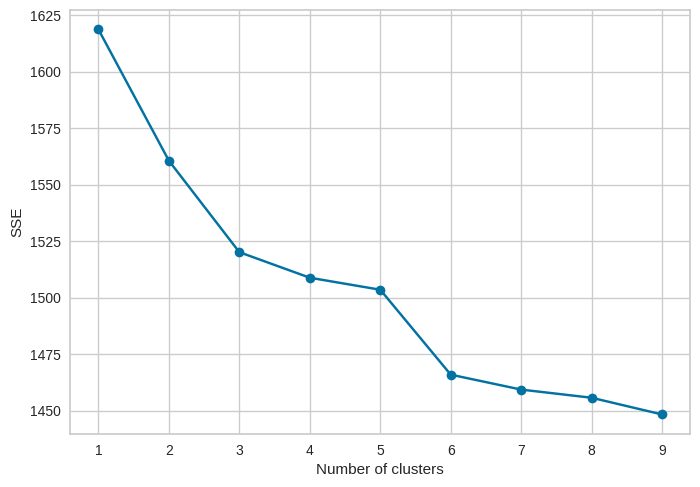

In [ ]:
SSE_list = []
for i in range(1, 10):
    kmeans_sse = KMeans(
        n_clusters=i, init='random', max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans_sse.fit(tfidf_matrix)
    SSE_list.append(kmeans_sse.inertia_)
plt.plot(range(1, 10), SSE_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Silhouette scores for the clusters from 2 to 10

In [ ]:
silhouette = []
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For n_clusters = 2, silhouette score is 0.02974283275137599)
For n_clusters = 3, silhouette score is 0.03982709937864232)
For n_clusters = 4, silhouette score is 0.04033379513309649)
For n_clusters = 5, silhouette score is 0.04105756550302427)
For n_clusters = 6, silhouette score is 0.041923641295931395)
For n_clusters = 7, silhouette score is 0.042516836531792085)
For n_clusters = 8, silhouette score is 0.042425800678805664)
For n_clusters = 9, silhouette score is 0.04169269928323199)


## Here, the optimal cluster found is 5 from the elbow method as well as silhouette analysis

# Now, we perform K-means clustering for the technology data for forming the clusters

In [ ]:
num_clusters = 5

km = KMeans(n_clusters=num_clusters, init='random', max_iter=100, n_init=1)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
km.cluster_centers_.argsort()[:, ::-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[778, 290, 430, ..., 826, 929,   0],
       [162, 987, 899, ..., 515, 516,   0],
       [789, 826, 412, ..., 638, 637,   0],
       [434, 777, 778, ..., 623, 622, 499],
       [836, 573, 984, ..., 610, 608,   0]])

# These are the top terms per cluster

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
store_tech_clusters =[]
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :5]:
        print (' %s' % terms[ind])
    temp = []
    for ind in sorted(order_centroids[i, :]):
            if order_centroids[i,ind]>= 700:
              temp.append(terms[ind])
    store_tech_clusters.append(temp)


Top terms per cluster:
Cluster 0:
 science
 essay
 help
 people
 pay
Cluster 1:
 computer
 work
 time
 day
 phone
Cluster 2:
 security
 source
 hack
 cybersecurity
 cyber
Cluster 3:
 high
 school
 science
 bartow
 boys
Cluster 4:
 start
 meet
 women
 computer
 market


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# We proceed with Dimensionality reduction using Multidimensionality scaling method

## For this we define a error term as the cosine similarity distance matrix using which we will subtract the actual matrix and pass it to the MDS method

In [ ]:
dist = 1 - cosine_similarity(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
userid_technology = data.user
location_technology = data.location

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Implementing the MDS method

In [ ]:
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

cluster_names = {0: 'Tech_Cluster 0',
                 1: 'Tech_Cluster 1',
                 2: 'Tech_Cluster 2',
                 3: 'Tech_Cluster 3',
                 4: 'Tech_Cluster 4'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualizing the clusters with usernames

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


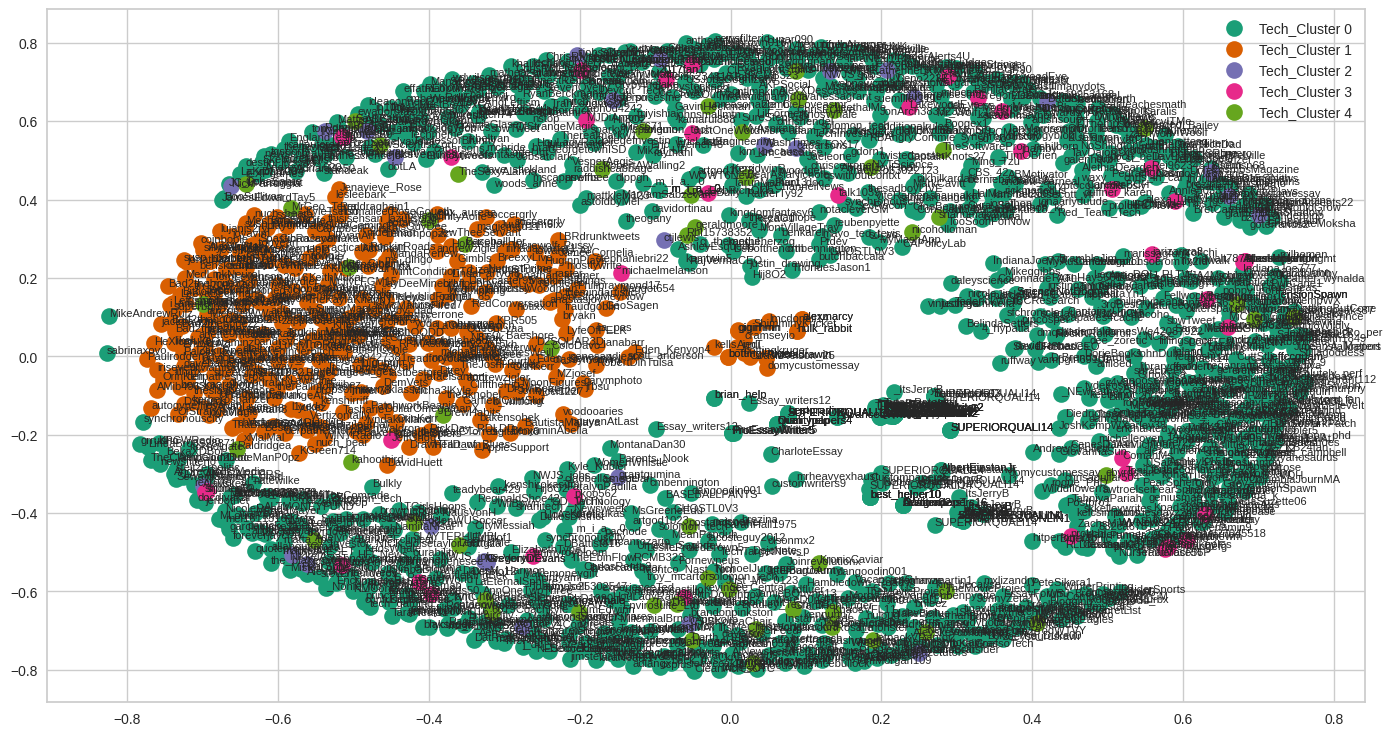

In [ ]:
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=userid_technology.values))

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

ax.legend(numpoints=1)
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)

plt.show()


# Visualizing the clusters without the usernames

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


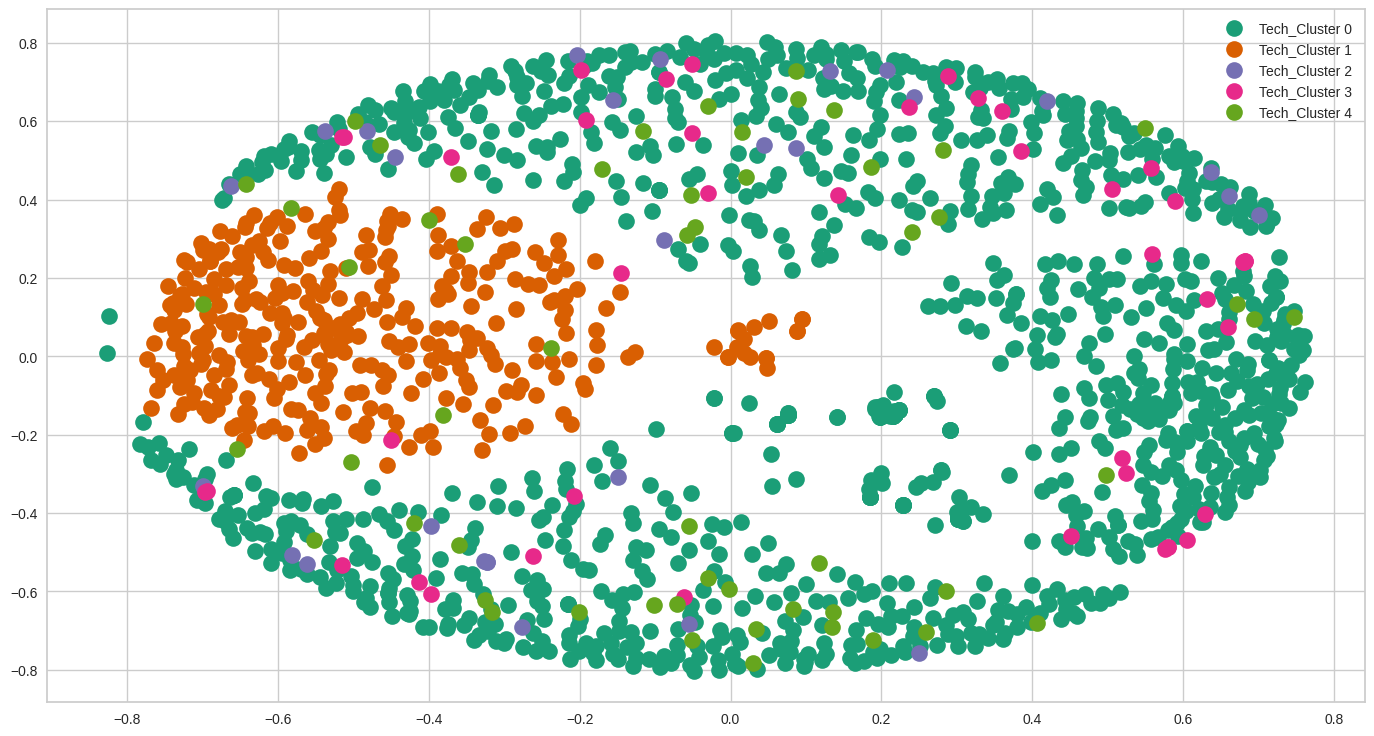

In [ ]:
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=userid_technology.values))

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

ax.legend(numpoints=1)
plt.show()

In [ ]:
data['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


user           location  \
0  NASALaserComm      Greenbelt, MD   
1   turntidetech      Sunnyvale, CA   
2       TRUEUP90      Royal Oak, MI   
3   Parents_Nook  San Francisco, CA   
4    BlakeBeilue         Denver, CO   

                                               tweet  \
0  agu represent share benefit laser communicatio...   
1  transform business fight climate change tend n...   
2     send tesla exchange theory travel interstellar   
3  best work deep problem satisfy ignore communit...   
4  substitute type android real dak play week adv...   

                                     tokenized_sents  cluster  
0  [agu, represent, share, benefit, laser, commun...        0  
1  [transform, business, fight, climate, change, ...        0  
2  [send, tesla, exchange, theory, travel, inters...        0  
3  [best, work, deep, problem, satisfy, ignore, c...        0  
4  [substitute, type, android, real, dak, play, w...        0

In [ ]:
data_tech = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_tech.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


user           location  \
0  NASALaserComm      Greenbelt, MD   
1   turntidetech      Sunnyvale, CA   
2       TRUEUP90      Royal Oak, MI   
3   Parents_Nook  San Francisco, CA   
4    BlakeBeilue         Denver, CO   

                                               tweet  \
0  agu represent share benefit laser communicatio...   
1  transform business fight climate change tend n...   
2     send tesla exchange theory travel interstellar   
3  best work deep problem satisfy ignore communit...   
4  substitute type android real dak play week adv...   

                                     tokenized_sents  cluster  
0  [agu, represent, share, benefit, laser, commun...        0  
1  [transform, business, fight, climate, change, ...        0  
2  [send, tesla, exchange, theory, travel, inters...        0  
3  [best, work, deep, problem, satisfy, ignore, c...        0  
4  [substitute, type, android, real, dak, play, w...        0

In [ ]:
tfidf_todense = tfidf_matrix.todense()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tfidf_todense

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# PHASE 2 : SENTIMENT ANALYSIS

# Performing NRC Lexicon for Each Clusters in Technology Community

#### For Cluster 1

In [ ]:
tfidf_dict_techc1 = {}
for token in store_tech_clusters[0]:
    if token not in tfidf_dict_techc1:
        if token in feature_names:
            tfidf_dict_techc1[token] = np.max(tfidf_todense[:,np.where(feature_names == token)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_score = {}
for i in range(len(store_tech_clusters[0])):
    processed_score[i] = 0
    try:
        processed_score[i] += tfidf_dict_techc1[store_tech_clusters[0][i].lower()]
    except:
        continue

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_tweets= [(k, l) for k,l in sorted(processed_score.items(), key= lambda x: x[1], reverse=True)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Main code snippet for NRC Lexicon

In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
#data_emotion = open("NRC-Lexicon.txt")
next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Here, we try to process all the words in the tweets and give the score related to NRC Lexicon to each tweet and try to gain the emotion related to each tweet

In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet = store_tech_clusters[0][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list = [emotion_score[i] + res_list[i] for i in range(len(emotions))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Result list comprises of the whole emotion scores related to 10 different emotions in NRC Lexicon

In [ ]:
res_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[17.0, 26.0, 10.0, 21.0, 24.0, 33.0, 55.0, 14.0, 13.0, 35.0]

## From here, we perform the same set of steps for all the 5 clusters

#### For Cluster 2

In [ ]:
tfidf_dict_techc2 = {}
for token in store_tech_clusters[1]:
    if token not in tfidf_dict_techc2:
        if token in feature_names:
            tfidf_dict_techc2[token] = np.max(tfidf_todense[:,np.where(feature_names ==token)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_score2 = {}
for i in range(len(store_tech_clusters[1])):
    processed_score2[i] = 0
    try:
        processed_score2[i] += tfidf_dict_techc2[store_tech_clusters[1][i].lower()]
    except:
        continue

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_tweets2= [(k, l) for k,l in sorted(processed_score2.items(), key= lambda x: x[1], reverse=True)]
#print(top_tweets2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
#data_emotion = open("NRC-Lexicon.txt")

next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list2 = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets2:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet2 = store_tech_clusters[1][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet2.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list2 = [emotion_score[i] + res_list2[i] for i in range(len(emotions))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
res_list2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[8.0, 24.0, 1.0, 12.0, 17.0, 27.0, 41.0, 11.0, 7.0, 26.0]

#### For Cluster 3


In [ ]:
tfidf_dict_techc3 = {}
for token in store_tech_clusters[2]:
    if token not in tfidf_dict_techc3:
        if token in feature_names:
            tfidf_dict_techc3[token] = np.max(tfidf_todense[:,np.where(feature_names ==token)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_score3 = {}
for i in range(len(store_tech_clusters[2])):
    processed_score3[i] = 0
    try:
        processed_score3[i] += tfidf_dict_techc3[store_tech_clusters[2][i].lower()]
    except:
        continue

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_tweets3= [(k, l) for k,l in sorted(processed_score3.items(), key= lambda x: x[1], reverse=True)]
#print(top_tweets3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
#data_emotion = open("NRC-Lexicon.txt")

next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list3 = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets3:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet3 = store_tech_clusters[2][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet3.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list3 = [emotion_score[i] + res_list3[i] for i in range(len(emotions))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
res_list3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[6.0, 22.0, 5.0, 10.0, 14.0, 18.0, 54.0, 10.0, 5.0, 30.0]

#### For Cluster 4

In [ ]:
tfidf_dict_techc4 = {}
for token in store_tech_clusters[3]:
    if token not in tfidf_dict_techc4:
        if token in feature_names:
            tfidf_dict_techc4[token] = np.max(tfidf_todense[:,np.where(feature_names ==token)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_score4 = {}
for i in range(len(store_tech_clusters[3])):
    processed_score4[i] = 0
    try:
        processed_score4[i] += tfidf_dict_techc4[store_tech_clusters[3][i].lower()]
    except:
        continue

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_tweets4= [(k, l) for k,l in sorted(processed_score4.items(), key= lambda x: x[1], reverse=True)]
#print(top_tweets3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
#data_emotion = open("NRC-Lexicon.txt")

next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list4 = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets4:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet4 = store_tech_clusters[3][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet4.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list4 = [emotion_score[i] + res_list4[i] for i in range(len(emotions))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
res_list4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[7.0, 19.0, 2.0, 12.0, 11.0, 17.0, 53.0, 9.0, 4.0, 31.0]

#### For Cluster 5

In [ ]:
tfidf_dict_techc5 = {}
for token in store_tech_clusters[4]:
    if token not in tfidf_dict_techc5:
        if token in feature_names:
            tfidf_dict_techc5[token] = np.max(tfidf_todense[:,np.where(feature_names ==token)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_score5 = {}
for i in range(len(store_tech_clusters[4])):
    processed_score5[i] = 0
    try:
        processed_score5[i] += tfidf_dict_techc5[store_tech_clusters[4][i].lower()]
    except:
        continue

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_tweets5= [(k, l) for k,l in sorted(processed_score5.items(), key= lambda x: x[1], reverse=True)]
#print(top_tweets5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
#data_emotion = open("NRC-Lexicon.txt")

next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list5 = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets5:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet5 = store_tech_clusters[4][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet5.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list5 = [emotion_score[i] + res_list5[i] for i in range(len(emotions))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
res_list5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[8.0, 25.0, 4.0, 11.0, 15.0, 18.0, 53.0, 9.0, 5.0, 33.0]

# Using the resulting emotions above we plot the same for decoding and analyzing the emotions for all the clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-77-446501989d07>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis',10)


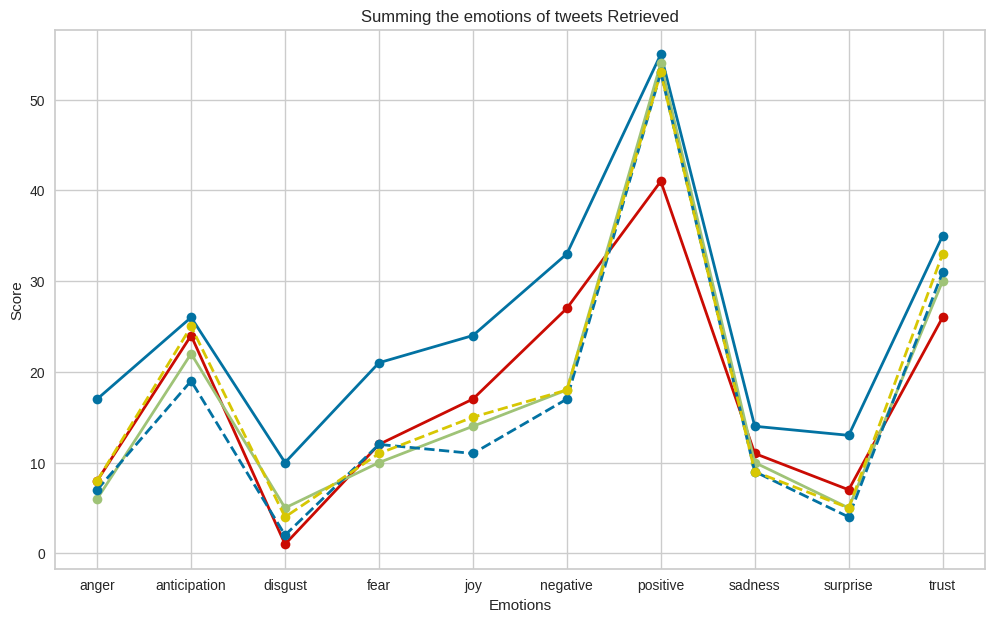

In [ ]:
from matplotlib import cm
# Bar plot of overall emotions of the tweets:
# for each tweet we have added the emotion score ---- NOT NORMALIZED
# then summed all emotions over all tweets:
viridis = cm.get_cmap('viridis',10)
#print(viridis)
plt.figure(figsize=(12,7))

plt.title("Summing the emotions of tweets Retrieved")
plt.xlabel("Emotions")
plt.ylabel("Score")
plt.plot(emotions,res_list,'bo-',label="Cluster1",linewidth=2)
plt.plot(emotions,res_list2,'ro-',label="Cluster2",linewidth=2)
plt.plot(emotions,res_list3,'go-',label="Cluster3",linewidth=2)
plt.plot(emotions,res_list4,'bo--',label="Cluster4",linewidth=2)
plt.plot(emotions,res_list5,'yo--',label="Cluster5",linewidth=2)

plt.show()

# Performing NRC VAD Lexicon for Each Clusters in Technology Community

### Loading the file into the dictionary

In [ ]:
# Sentimental analysis using Valance Arousal and Dominace Data

# loading the file into a dictionary
data_lexicon = open("/content/sample_data/NRC-VAD-Lexicon.txt")
#data_lexicon = open("NRC-VAD-Lexicon.txt")
next(data_lexicon)
vad = {}
for line in data_lexicon:
    word, var, aro, dom = line.strip().split("\t")
    vad[word] = [float(var),float(aro),float(dom)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 1

### Visualizing the VAD GRAPHS for each tweets by correlating the scores from the lexicon dictionary to the keywords in the tweets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


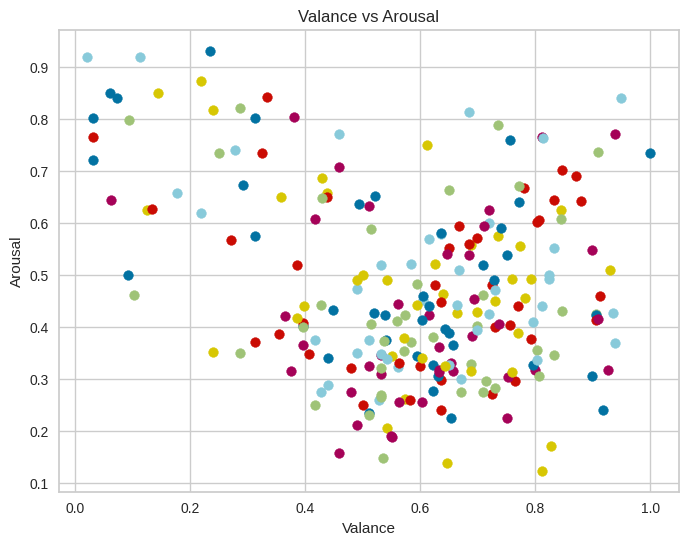

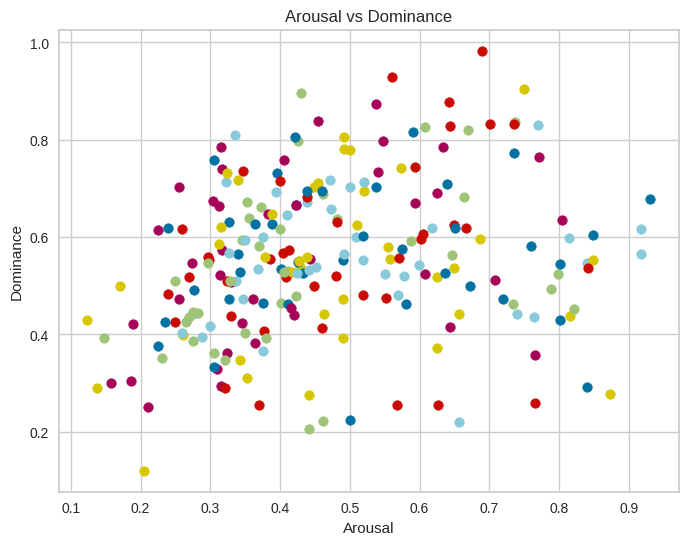

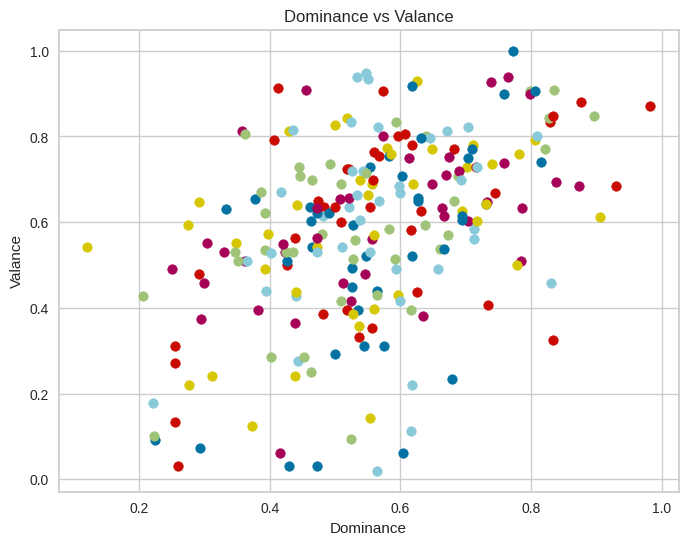

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va1 = []
top_tweets_ad1 = []
top_tweets_dv1 = []
for tweet in top_tweets:
    index = tweet[0]
    clean_tweet1 = store_tech_clusters[0][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score1 = 0
    arousal_score1 = 0
    dominance_score1 = 0
    for each_word in clean_tweet1.split():
        if each_word in vad:
            val_score1 += vad[each_word][0]
            arousal_score1 += vad[each_word][1]
            dominance_score1 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va1.append([val_score1/count, arousal_score1/count])
        top_tweets_ad1.append([arousal_score1/count, dominance_score1/count])
        top_tweets_dv1.append([dominance_score1/count, val_score1/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va1)):
  plt.scatter(top_tweets_va1[i][0], top_tweets_va1[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va1)):
  plt.scatter(top_tweets_ad1[i][0], top_tweets_ad1[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va1)):
  plt.scatter(top_tweets_dv1[i][0], top_tweets_dv1[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

### We perform the same set of steps henceforth for all the 5 clusters

#### For Cluster 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


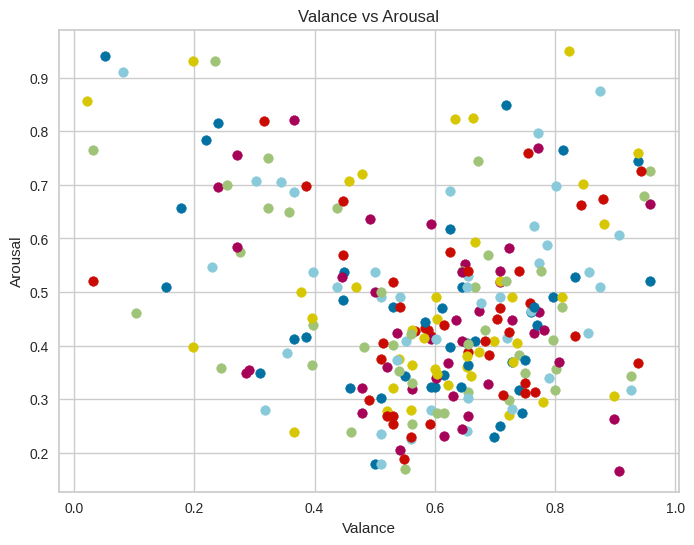

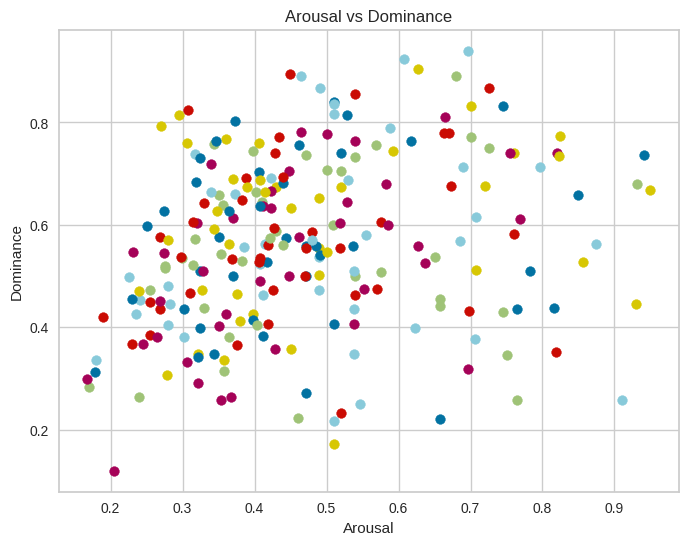

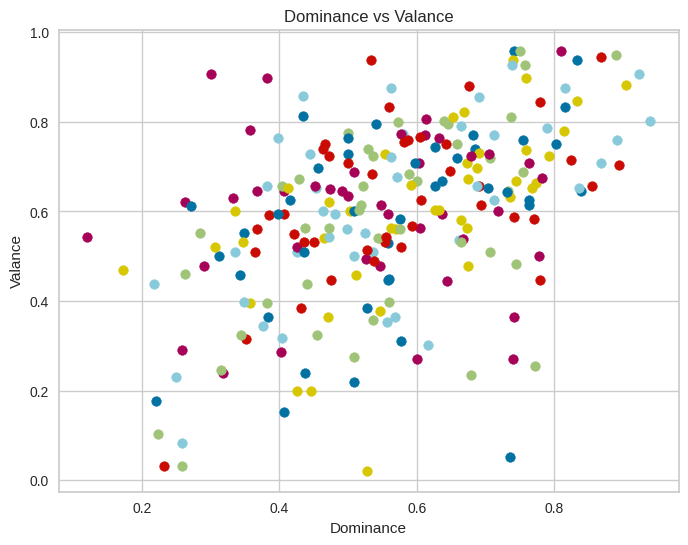

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va2 = []
top_tweets_ad2 = []
top_tweets_dv2 = []
for tweet in top_tweets2:
    index = tweet[0]
    clean_tweet2 = store_tech_clusters[1][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score2 = 0
    arousal_score2 = 0
    dominance_score2 = 0
    for each_word in clean_tweet2.split():
        if each_word in vad:
            val_score2 += vad[each_word][0]
            arousal_score2 += vad[each_word][1]
            dominance_score2 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va2.append([val_score2/count, arousal_score2/count])
        top_tweets_ad2.append([arousal_score2/count, dominance_score2/count])
        top_tweets_dv2.append([dominance_score2/count, val_score2/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va2)):
  plt.scatter(top_tweets_va2[i][0], top_tweets_va2[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va2)):
  plt.scatter(top_tweets_ad2[i][0], top_tweets_ad2[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va2)):
  plt.scatter(top_tweets_dv2[i][0], top_tweets_dv2[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

#### For Cluster 3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


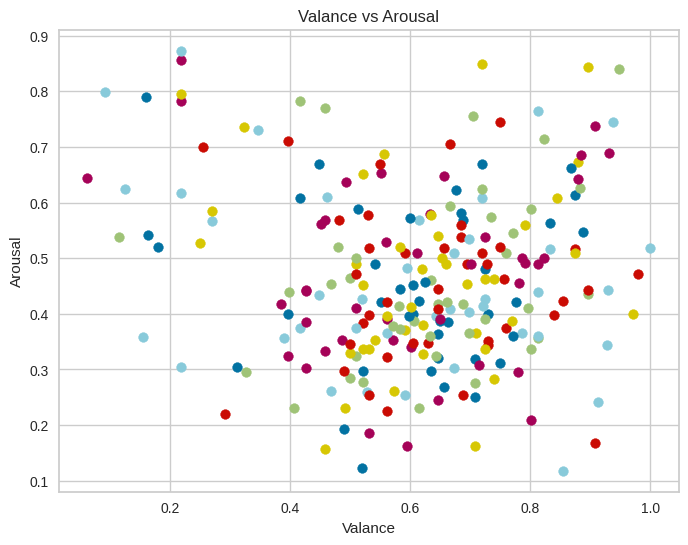

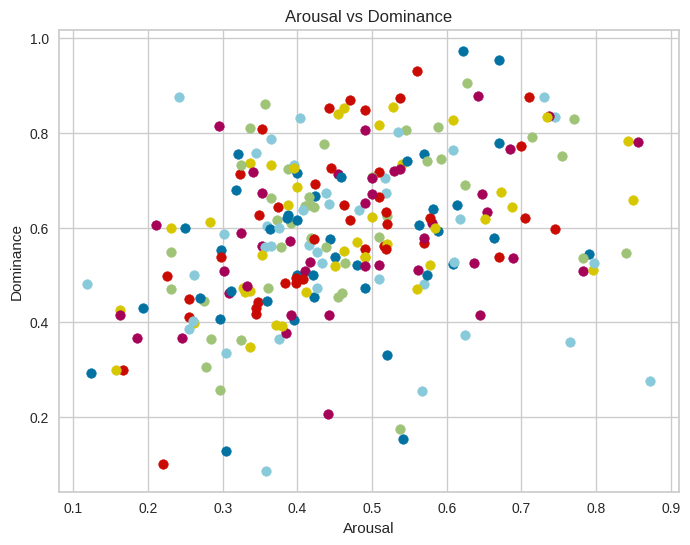

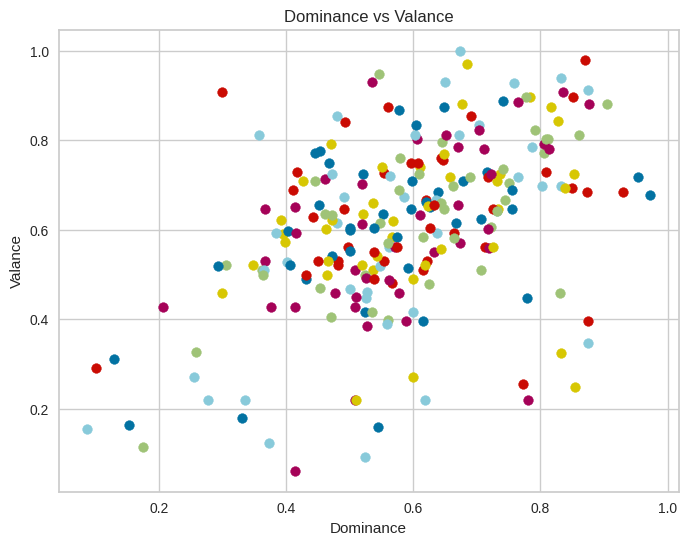

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va3 = []
top_tweets_ad3 = []
top_tweets_dv3 = []
for tweet in top_tweets3:
    index = tweet[0]
    clean_tweet3 = store_tech_clusters[2][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score3 = 0
    arousal_score3 = 0
    dominance_score3 = 0
    for each_word in clean_tweet3.split():
        if each_word in vad:
            val_score3 += vad[each_word][0]
            arousal_score3 += vad[each_word][1]
            dominance_score3 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va3.append([val_score3/count, arousal_score3/count])
        top_tweets_ad3.append([arousal_score3/count, dominance_score3/count])
        top_tweets_dv3.append([dominance_score3/count, val_score3/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va3)):
  plt.scatter(top_tweets_va3[i][0], top_tweets_va3[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va3)):
  plt.scatter(top_tweets_ad3[i][0], top_tweets_ad3[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va3)):
  plt.scatter(top_tweets_dv3[i][0], top_tweets_dv3[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

#### For Cluster 4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


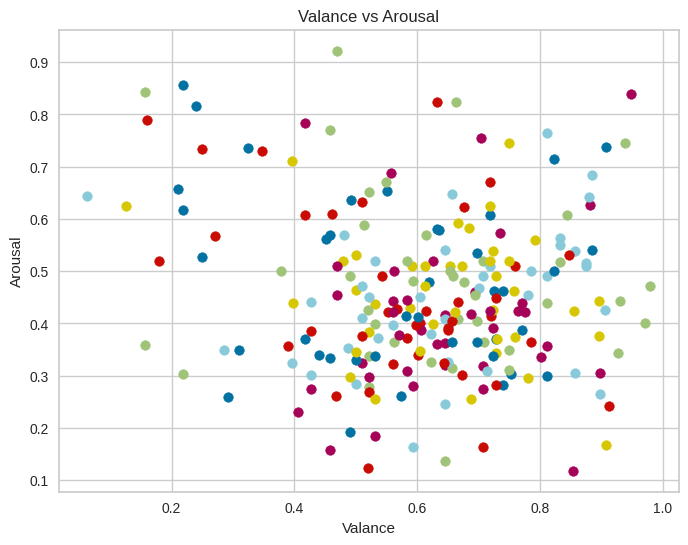

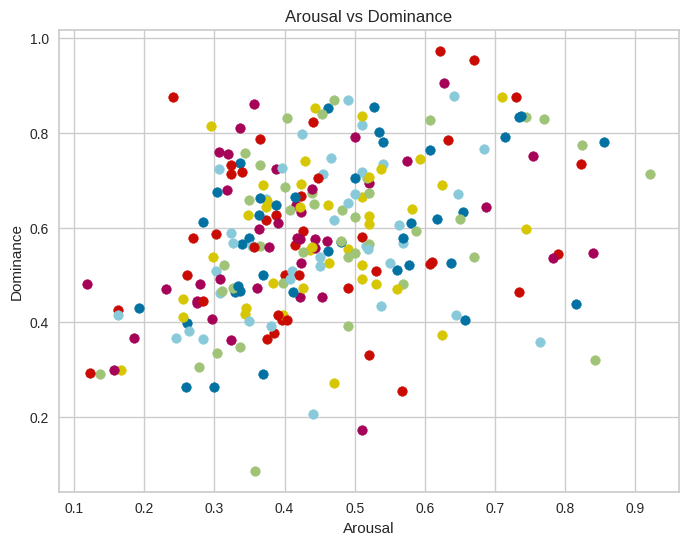

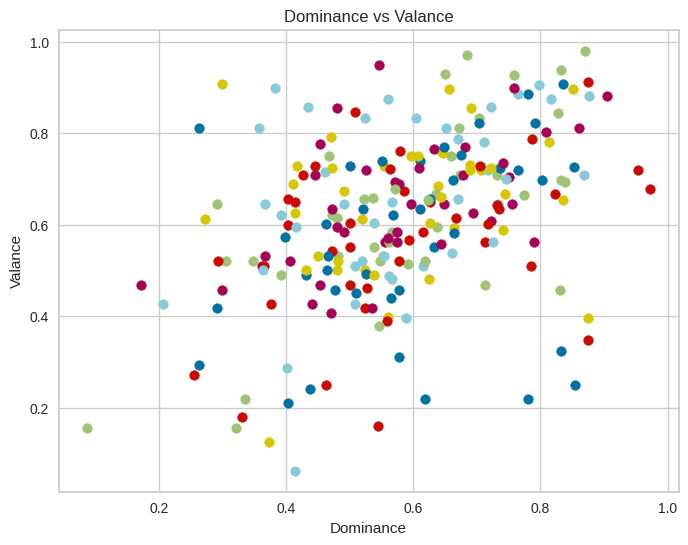

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va4 = []
top_tweets_ad4 = []
top_tweets_dv4 = []
for tweet in top_tweets4:
    index = tweet[0]
    clean_tweet4 = store_tech_clusters[3][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score4 = 0
    arousal_score4 = 0
    dominance_score4 = 0
    for each_word in clean_tweet4.split():
        if each_word in vad:
            val_score4 += vad[each_word][0]
            arousal_score4 += vad[each_word][1]
            dominance_score4 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va4.append([val_score4/count, arousal_score4/count])
        top_tweets_ad4.append([arousal_score4/count, dominance_score4/count])
        top_tweets_dv4.append([dominance_score4/count, val_score4/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va4)):
  plt.scatter(top_tweets_va4[i][0], top_tweets_va4[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va4)):
  plt.scatter(top_tweets_ad4[i][0], top_tweets_ad4[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va4)):
  plt.scatter(top_tweets_dv4[i][0], top_tweets_dv4[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

#### For Cluster 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


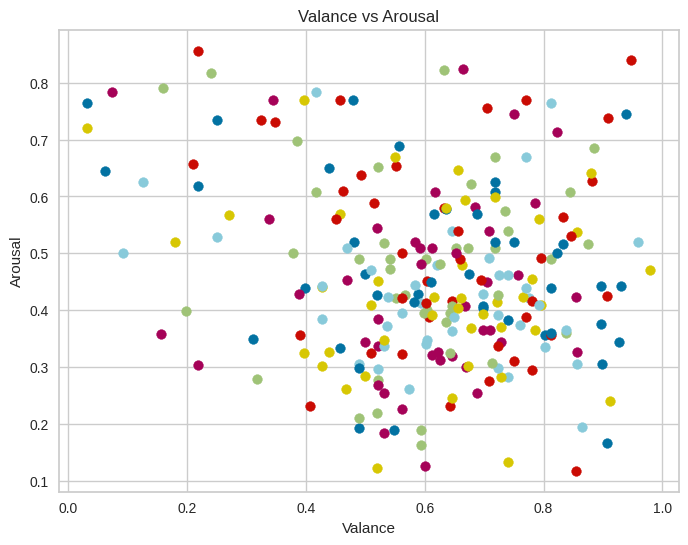

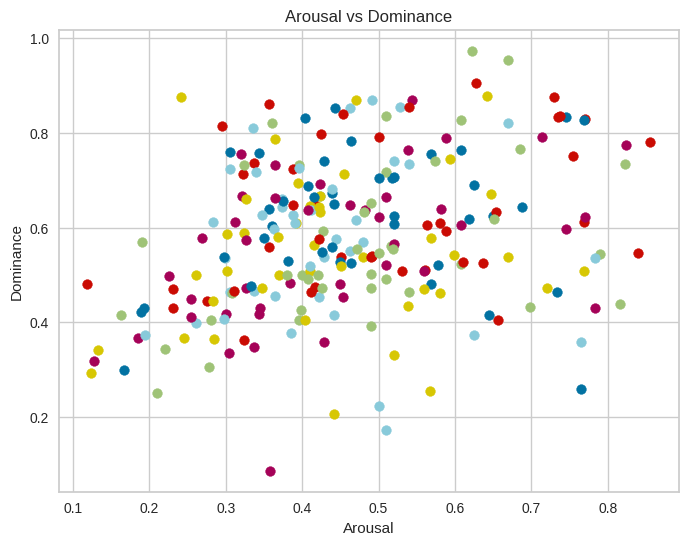

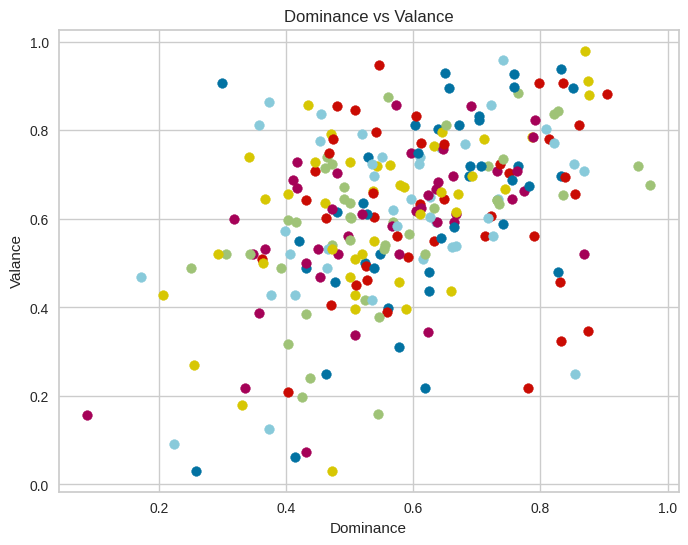

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va5 = []
top_tweets_ad5 = []
top_tweets_dv5 = []
for tweet in top_tweets5:
    index = tweet[0]
    clean_tweet5 = store_tech_clusters[4][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score5 = 0
    arousal_score5 = 0
    dominance_score5 = 0
    for each_word in clean_tweet5.split():
        if each_word in vad:
            val_score5 += vad[each_word][0]
            arousal_score5 += vad[each_word][1]
            dominance_score5 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va5.append([val_score5/count, arousal_score5/count])
        top_tweets_ad5.append([arousal_score5/count, dominance_score5/count])
        top_tweets_dv5.append([dominance_score5/count, val_score5/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va5)):
  plt.scatter(top_tweets_va5[i][0], top_tweets_va5[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va5)):
  plt.scatter(top_tweets_ad5[i][0], top_tweets_ad5[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va5)):
  plt.scatter(top_tweets_dv5[i][0], top_tweets_dv5[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

# VADER Implementation

In [ ]:
analyzer = SentimentIntensityAnalyzer()
data['vader_scores'] = data['tokenized_sents'].apply(lambda x: [analyzer.polarity_scores(word) for word in x])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Taking into consideration the agg VADER scores for all the tweets

In [ ]:
def agg_vader_score(data2):
  return sum([data2[i]['compound'] for i in range(len(data2))])/len(data2)
temp =[]
for i in range(len(data)):
  temp.append(agg_vader_score(data['vader_scores'][i]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['agg_vader_score'] = temp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Setting the mean cluster polarity for the threshold of the tweets to decide the positive and negative tweets

In [ ]:
mean_cluster_polarity = []
for i in range(0,5):
  #print(i, data['agg_vader_score'][(data.cluster == i)].mean())
  mean_cluster_polarity.append(data['agg_vader_score'][(data.cluster == i)].mean())
print(mean_cluster_polarity)

[0.021519009344567477, 0.009560600498925707, 0.024957867732788123, 0.008065716536691024, 0.0172528341951775]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentiments_count_cluster = []
datac1 = data['agg_vader_score'][(data.cluster == 0)]
tech_cluster1_list = datac1.values.tolist()

datac2 = data['agg_vader_score'][(data.cluster == 1)]
tech_cluster2_list = datac2.values.tolist()

datac3 = data['agg_vader_score'][(data.cluster == 2)]
tech_cluster3_list = datac3.values.tolist()

datac4 = data['agg_vader_score'][(data.cluster == 3)]
tech_cluster4_list = datac4.values.tolist()

datac5 = data['agg_vader_score'][(data.cluster == 4)]
tech_cluster5_list = datac5.values.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Deduction of total overall positive and negative tweets in each cluster and preparing the data for visualization

#### For Cluster 1

In [ ]:
negative_count = 0
positive_count = 0
for i in range(len(tech_cluster1_list)):
  if tech_cluster1_list[i] < -mean_cluster_polarity[0]:
    negative_count = negative_count + 1
  elif tech_cluster1_list[i] > mean_cluster_polarity[0]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[523, 215]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 2

In [ ]:
for i in range(len(tech_cluster2_list)):
  if tech_cluster2_list[i] < -mean_cluster_polarity[1]:
    negative_count = negative_count + 1
  elif tech_cluster2_list[i] > mean_cluster_polarity[1]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[523, 215], [152, 93]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 3

In [ ]:
for i in range(len(tech_cluster3_list)):
  if tech_cluster3_list[i] < -mean_cluster_polarity[2]:
    negative_count = negative_count + 1
  elif tech_cluster3_list[i] > mean_cluster_polarity[2]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[523, 215], [152, 93], [11, 3]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 4

In [ ]:
for i in range(len(tech_cluster4_list)):
  if tech_cluster4_list[i] < -mean_cluster_polarity[3]:
    negative_count = negative_count + 1
  elif tech_cluster4_list[i] > mean_cluster_polarity[3]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[523, 215], [152, 93], [11, 3], [13, 12]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 5

In [ ]:
for i in range(len(tech_cluster5_list)):
  if tech_cluster5_list[i] < -mean_cluster_polarity[4]:
    negative_count = negative_count + 1
  elif tech_cluster5_list[i] > mean_cluster_polarity[4]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[523, 215], [152, 93], [11, 3], [13, 12], [28, 12]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Graphical representation of VADER for each of the clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


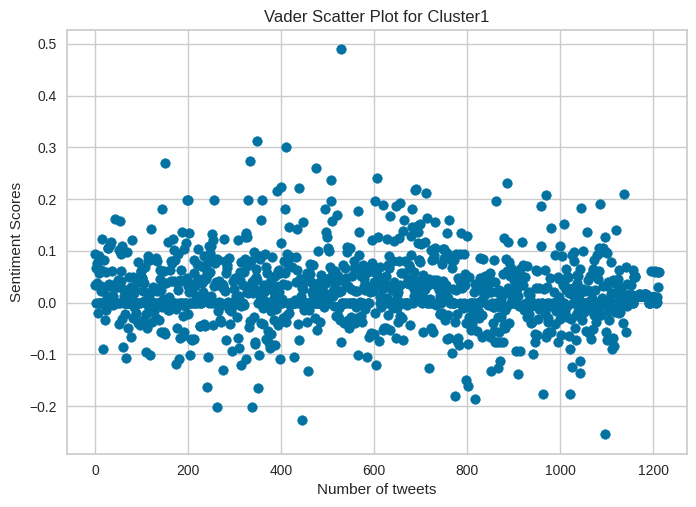

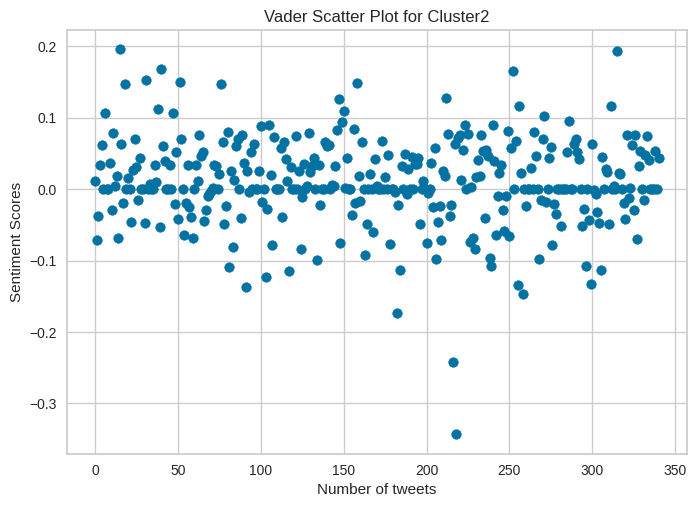

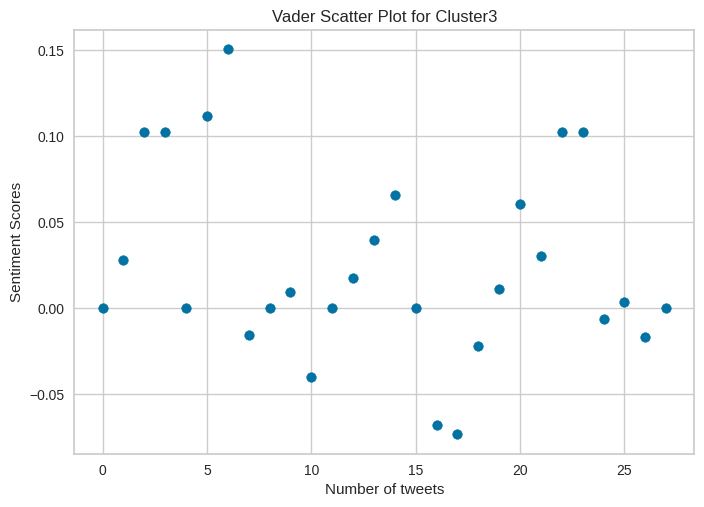

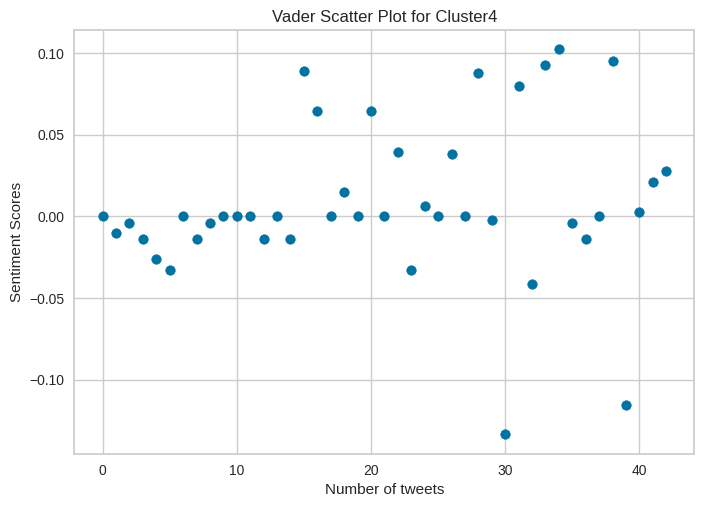

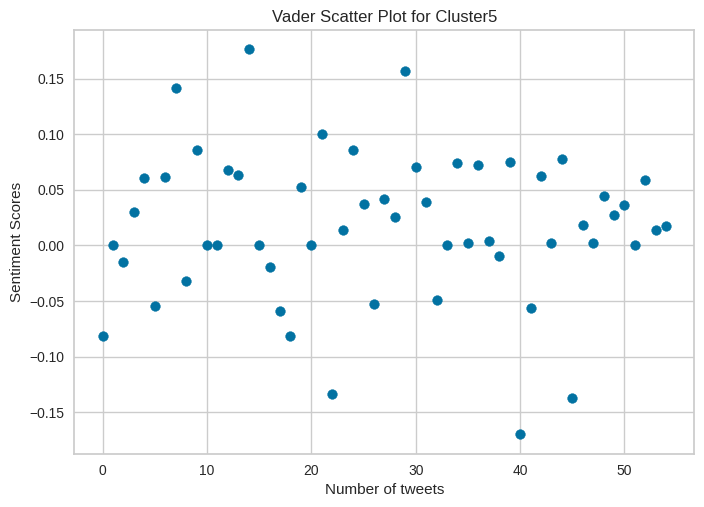

In [ ]:
tech_cluster_list = [tech_cluster1_list,tech_cluster2_list,tech_cluster3_list,tech_cluster4_list, tech_cluster5_list]
i = 1
for subscore in tech_cluster_list:
    x = range(len(subscore))
    plt.scatter(x, subscore)

# Set the x and y axis labels
    plt.xlabel('Number of tweets')
    plt.ylabel('Sentiment Scores')

# Set the title of the plot
    plt.title('Vader Scatter Plot for Cluster' + str(i))
    i+=1

# Show the plot
    plt.show()

# AFINN Implementation

In [ ]:
afinn = Afinn()

data['afinn_scores'] = data['tokenized_sents'].apply(lambda x: [afinn.score(word) for word in x])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['afinn_scores']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                [0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0]
1       [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0,...
2                          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3       [3.0, 0.0, 0.0, -2.0, 0.0, -1.0, 0.0, 0.0, 1.0...
4           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                              ...                        
1675                       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1676                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1677    [0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1678                       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1679    [1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
Name: afinn_scores, Length: 1680, dtype: object

### Taking into consideration the agg AFINN scores for all the tweets

In [ ]:
def agg_afinn_score(data2):
  return sum([data2[i] for i in range(len(data2))])/len(data2)

temp = []
for i in range(len(data)):
  temp.append(agg_afinn_score(data['afinn_scores'][i]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['agg_afinn_score'] = temp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Setting the mean cluster polarity for the threshold of the tweets to decide the positive and negative tweets

In [ ]:
mean_cluster_polarity = []
for i in range(0,5):
  #print(i, data['agg_vader_score'][(data.cluster == i)].mean())
  mean_cluster_polarity.append(data['agg_afinn_score'][(data.cluster == i)].mean())
print(mean_cluster_polarity)

[0.06529010667304251, 0.009538018454755747, 0.012979449539599933, 0.03595391062958452, 0.07080086470742254]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentiments_count_cluster_a = []
datac1_a = data['agg_afinn_score'][(data.cluster == 0)]
tech_cluster1_list_a = datac1_a.values.tolist()

datac2_a = data['agg_afinn_score'][(data.cluster == 1)]
tech_cluster2_list_a = datac2_a.values.tolist()

datac3_a = data['agg_afinn_score'][(data.cluster == 2)]
tech_cluster3_list_a = datac3_a.values.tolist()

datac4_a = data['agg_afinn_score'][(data.cluster == 3)]
tech_cluster4_list_a = datac4_a.values.tolist()

datac5_a = data['agg_afinn_score'][(data.cluster == 4)]
tech_cluster5_list_a = datac5_a.values.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Deduction of total overall positive and negative tweets in each cluster and preparing the data for visualization

#### For Cluster 1

In [ ]:
negative_count = 0
positive_count = 0
for i in range(len(tech_cluster1_list_a)):
  if tech_cluster1_list_a[i] < -mean_cluster_polarity[0]:
    negative_count = negative_count + 1
  elif tech_cluster1_list_a[i] > mean_cluster_polarity[0]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[491, 278]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 2

In [ ]:
for i in range(len(tech_cluster2_list_a)):
  if tech_cluster2_list_a[i] < -mean_cluster_polarity[1]:
    negative_count = negative_count + 1
  elif tech_cluster2_list_a[i] > mean_cluster_polarity[1]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[491, 278], [143, 100]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 3

In [ ]:
for i in range(len(tech_cluster3_list_a)):
  if tech_cluster3_list_a[i] < -mean_cluster_polarity[2]:
    negative_count = negative_count + 1
  elif tech_cluster3_list_a[i] > mean_cluster_polarity[2]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[491, 278], [143, 100], [9, 9]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 4

In [ ]:
for i in range(len(tech_cluster4_list_a)):
  if tech_cluster4_list_a[i] < -mean_cluster_polarity[3]:
    negative_count = negative_count + 1
  elif tech_cluster4_list_a[i] > mean_cluster_polarity[3]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[491, 278], [143, 100], [9, 9], [14, 16]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### For Cluster 5

In [ ]:
for i in range(len(tech_cluster5_list_a)):
  if tech_cluster5_list_a[i] < -mean_cluster_polarity[4]:
    negative_count = negative_count + 1
  elif tech_cluster5_list_a[i] > mean_cluster_polarity[4]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[491, 278], [143, 100], [9, 9], [14, 16], [28, 16]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Graphical representation of AFINN for each of the clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


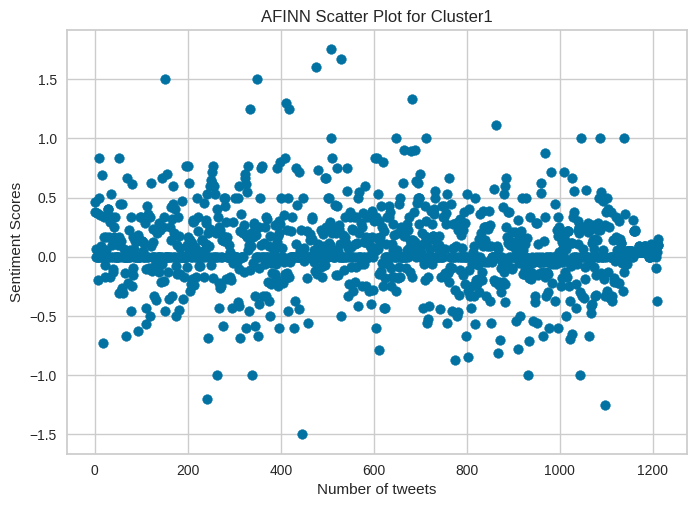

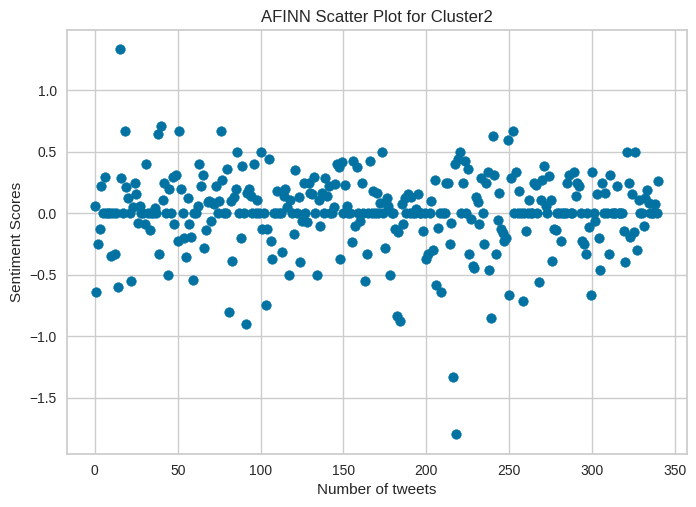

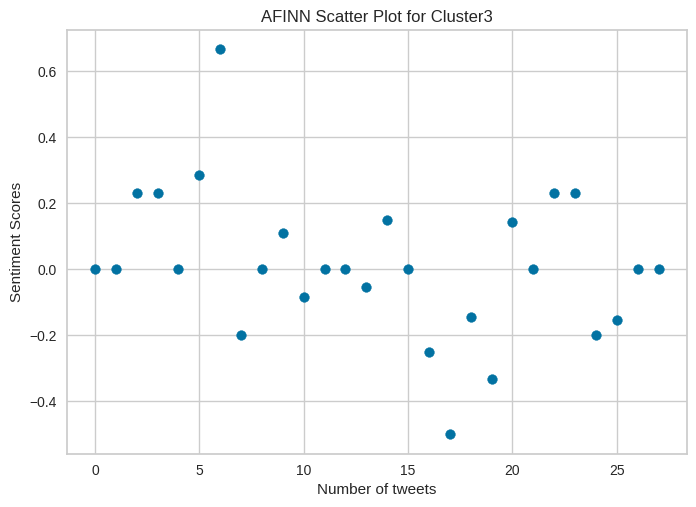

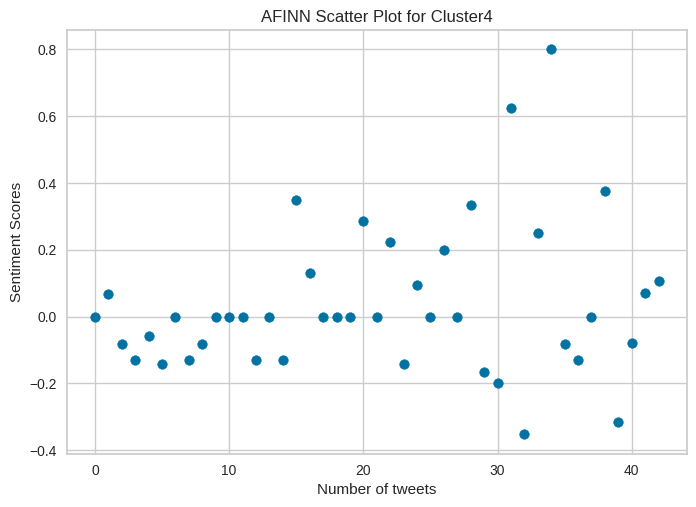

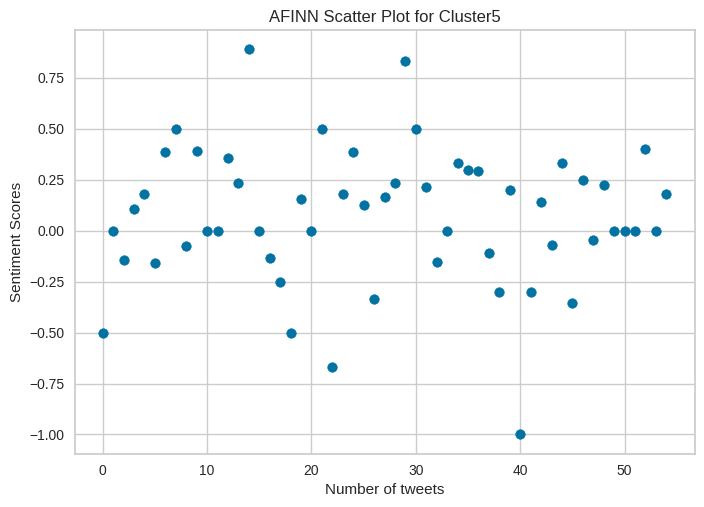

In [ ]:
tech_cluster_list_a = [tech_cluster1_list_a,tech_cluster2_list_a,tech_cluster3_list_a,tech_cluster4_list_a, tech_cluster5_list_a]
i = 1
for subscore in tech_cluster_list_a:
    x = range(len(subscore))
    plt.scatter(x, subscore)

# Set the x and y axis labels
    plt.xlabel('Number of tweets')
    plt.ylabel('Sentiment Scores')

# Set the title of the plot
    plt.title('AFINN Scatter Plot for Cluster' + str(i))
    i+=1

# Show the plot
    plt.show()

# ASSESSING SENTIMENT POLARITY AND SUBJECTIVITY POLARITY FOR EACH CLUSTER

In [ ]:
UniqueNames = data['cluster'].unique()
UniqueNames

DataFrameDict = {elem :
pd.DataFrame for elem in UniqueNames}
DataFrameDict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: pandas.core.frame.DataFrame,
 3: pandas.core.frame.DataFrame,
 2: pandas.core.frame.DataFrame,
 4: pandas.core.frame.DataFrame,
 1: pandas.core.frame.DataFrame}

In [ ]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data.cluster == key]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
polaritycluster={elem : pd.DataFrame for elem in UniqueNames}
subjectivitycluster={elem : pd.DataFrame for elem in UniqueNames}
for i in DataFrameDict.keys():
    polaritycluster[i]=TextBlob(' '.join(DataFrameDict[i]['tweet'].astype('str'))).sentiment.polarity
    subjectivitycluster[i]=TextBlob(' '.join(DataFrameDict[i]['tweet'].astype('str'))).sentiment.subjectivity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Polarity for all the clusters

In [ ]:
polaritycluster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: 0.11156258146011122,
 3: 0.08416937229437231,
 2: 0.09797101449275361,
 4: 0.08583159764763539,
 1: 0.06970779220779223}

### Subjectivity for all the clusters

In [ ]:
subjectivitycluster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: 0.5058927627227668,
 3: 0.4847581845238092,
 2: 0.5904347826086955,
 4: 0.5541097634022162,
 1: 0.5314240935831843}

## Visualizing the Polarity graph for all the clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


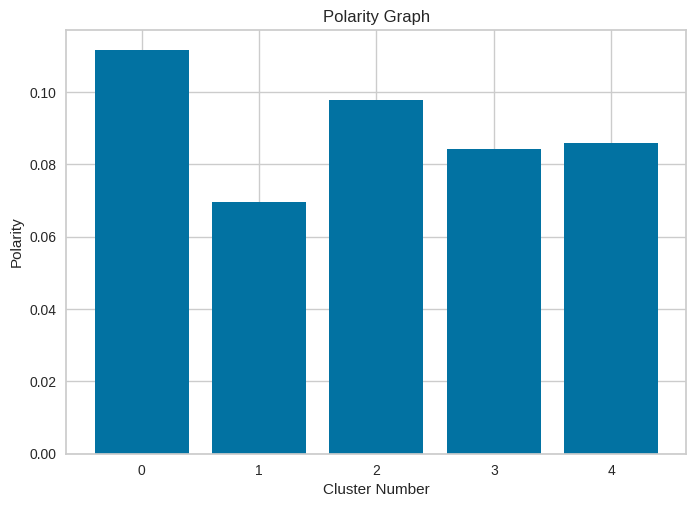

In [ ]:
plt.bar(list(polaritycluster.keys()), list(polaritycluster.values()))

plt.title('Polarity Graph')
plt.xlabel('Cluster Number')
plt.ylabel('Polarity')
plt.show()

## Visualizing the Subjectivity graph for all the clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


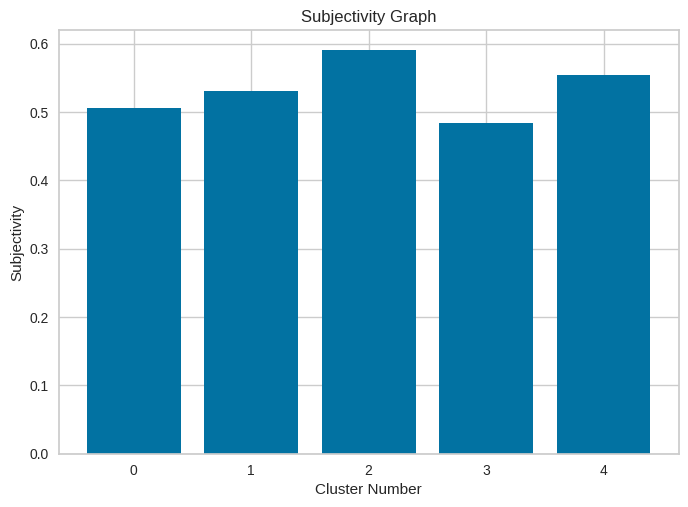

In [ ]:
plt.bar(list(subjectivitycluster.keys()), list(subjectivitycluster.values()))

plt.title('Subjectivity Graph')
plt.xlabel('Cluster Number')
plt.ylabel('Subjectivity')
plt.show()

## Visualizing the Polarity-Subjectivity Graph for all the clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


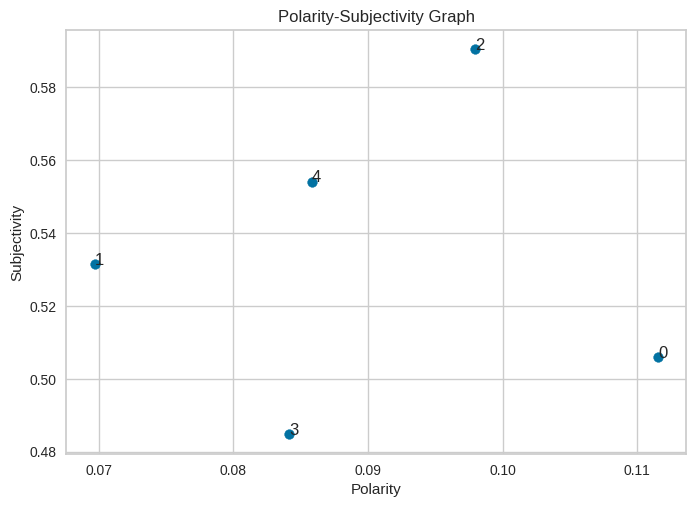

In [ ]:
#plt.scatter(list(polaritycluster.values()), list(subjectivitycluster.values()))

x=list(polaritycluster.values())
y=list(subjectivitycluster.values())

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, label in enumerate(polaritycluster.keys()):
    ax.annotate(label, (x[i], y[i]))

plt.title('Polarity-Subjectivity Graph')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# PHASE 3 : KEYWORD ANALYSIS

# Word Cloud Analysis

In [ ]:
store_tech_clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['abc',
  'accessible',
  'account',
  'actual',
  'add',
  'address',
  'admit',
  'ai',
  'algebra',
  'align',
  'allow',
  'answer',
  'areas',
  'argue',
  'assignments',
  'assume',
  'automate',
  'bad',
  'base',
  'basketball',
  'beliefs',
  'benefit',
  'best',
  'bill',
  'biology',
  'block',
  'blue',
  'boot',
  'budget',
  'california',
  'capture',
  'card',
  'case',
  'cell',
  'century',
  'chance',
  'charge',
  'chemistry',
  'child',
  'china',
  'class',
  'clean',
  'climate',
  'combine',
  'company',
  'computer',
  'concern',
  'contact',
  'content',
  'cost',
  'country',
  'couple',
  'coursework',
  'covid',
  'critical',
  'cry',
  'culture',
  'cut',
  'data',
  'daughter',
  'days',
  'deadly',
  'deal',
  'death',
  'deaths',
  'deep',
  'defeat',
  'deliver',
  'demand',
  'design',
  'detail',
  'develop',
  'devices',
  'die',
  'discussion',
  'dissertation',
  'dont',
  'door',
  'drink',
  'drone',
  'drop',
  'earth',
  'economics',
  'electr

In [ ]:
def listToString(s):

    # initialize an empty string
    str1 = ""

    # traverse in the string
    for ele in s:
        str1=str1+" "
        str1 += ele

    # return string
    return str1



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Word cloud visualization for all the clusters using the word cloud library

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


For Cluster: 
 1


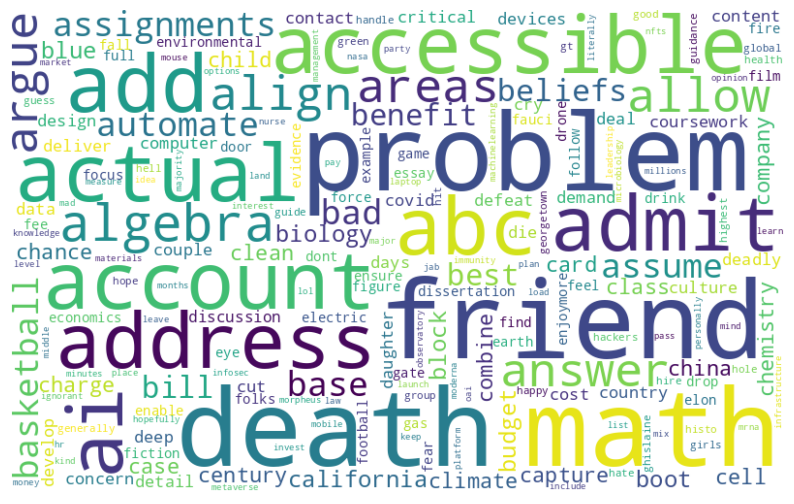



For Cluster: 
 2


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


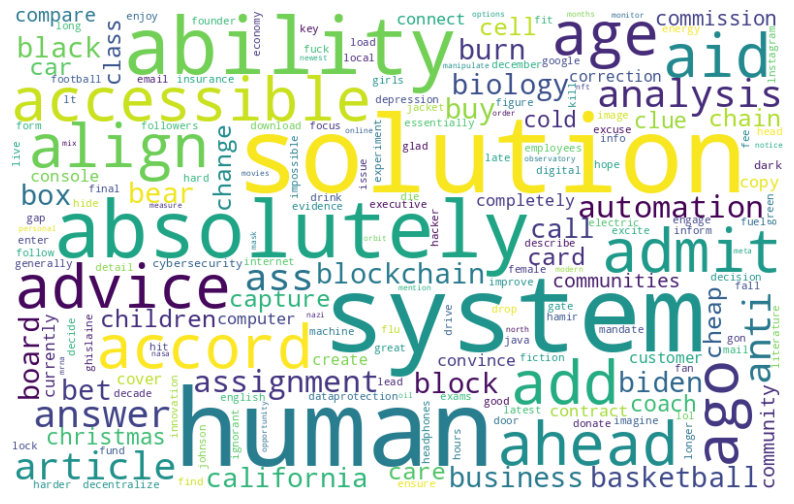



For Cluster: 
 3


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


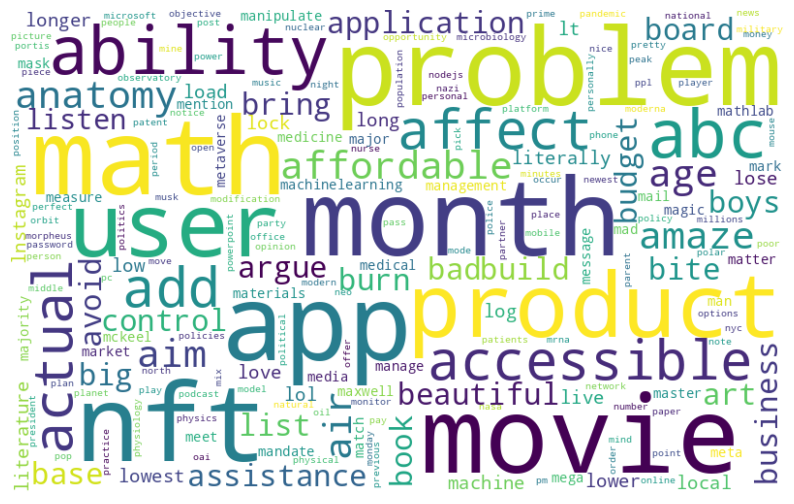



For Cluster: 
 4


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


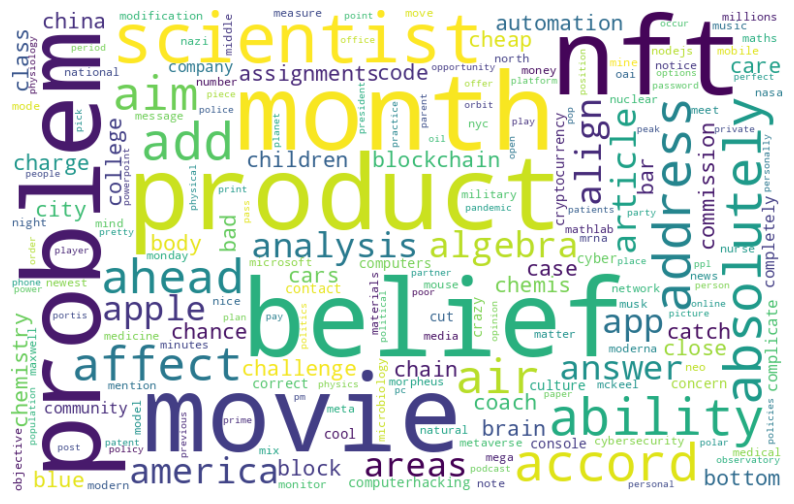



For Cluster: 
 5


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


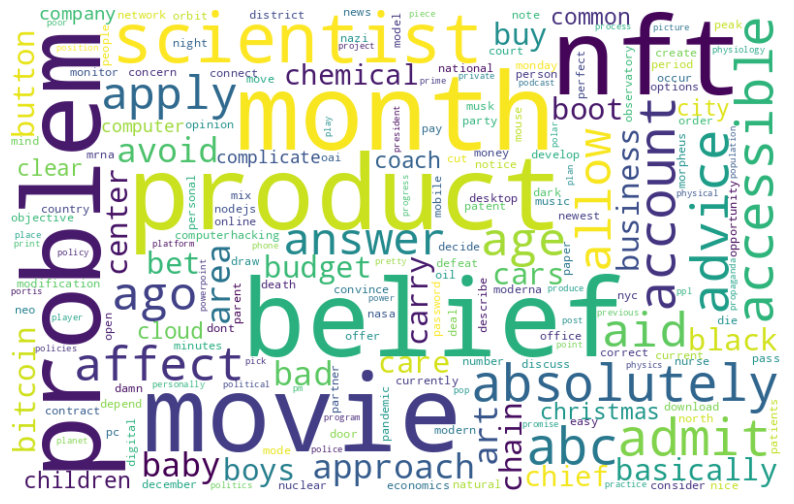

In [ ]:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


for i in range(len(store_tech_clusters)):
  print("For Cluster: \n",i+1)
  word_string=listToString(np.unique(np.hstack(store_tech_clusters[i])).tolist())
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(word_string)
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
  print("\n")

# LDA TOPIC MODELING

## For Cluster 1

In [ ]:
# Create Dictionary
mask = (data_tech['cluster']==0)
id2word = corpora.Dictionary(data_tech.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_tech['tokenized_sents']]

## Computing the coherence score for the clusters

<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

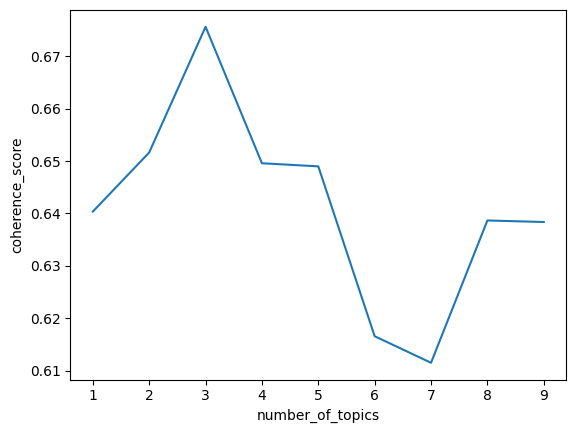

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_tech.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

## Using the highest peak of the number of topics we are defining the n_topics below.

##NOTE:  Inorder to get a broader idea and insights about users, sometimes we have selected the second highest peak as the number of topics.

In [ ]:

# Define the number of topics
n_topics = 3

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.129*"computer" + 0.015*"time" + 0.012*"day" + 0.011*"people" + 0.009*"years" + 0.009*"game" + 0.008*"spend" + 0.008*"ago" + 0.007*"feel" + 0.007*"clean"
Topic: 1 Word: 0.014*"science" + 0.011*"keep" + 0.010*"things" + 0.010*"business" + 0.009*"money" + 0.009*"today" + 0.008*"digital" + 0.007*"lose" + 0.007*"school" + 0.007*"understand"
Topic: 2 Word: 0.089*"computer" + 0.051*"science" + 0.039*"help" + 0.031*"pay" + 0.029*"write" + 0.029*"essay" + 0.026*"data" + 0.025*"work" + 0.024*"analysis" + 0.023*"history"


## Visualizing the LDA modelling for all the topics defined above

In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.173014  0.144165       1        1  38.177918
0      0.053189 -0.205993       2        1  32.477736
2     -0.226204  0.061829       3        1  29.344346, topic_info=          Term         Freq        Total Category  logprob  loglift
4070  computer  1241.000000  1241.000000  Default  30.0000  30.0000
23        help   212.000000   212.000000  Default  29.0000  29.0000
4027   science   372.000000   372.000000  Default  28.0000  28.0000
557        pay   167.000000   167.000000  Default  27.0000  27.0000
920      write   158.000000   158.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
961       book    28.590014    30.444253   Topic3  -5.2345   1.1632
4027   science   271.705119   372.117717   Topic3  -2.9829   0.9116
105       find    32.013290    34.856779   Topic3  -5.1215   1.1410
4070  computer   476.316641  1241.397803   Topic3  -2.4215   0.2682
1654    course    38.386856    47.253007   Topic3  -4.9399   1.0183

[143 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2784      1  0.984143   accord
89        1  0.020365  account
89        3  0.977509  account
2695      1  0.020096      ago
2695      2  0.984703      ago
...     ...       ...      ...
29        3  0.989054     work
920       1  0.006307    write
920       3  0.996578    write
74        1  0.017502    years
74        2  0.980111    years

[206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [ ]:
pyLDAvis.save_html(vis, "./tech-cluster0.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Repeating the same process for all clusters

## For Cluster 2

In [ ]:
# Create Dictionary
mask = (data_tech['cluster']==1)
id2word = corpora.Dictionary(data_tech.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_tech['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

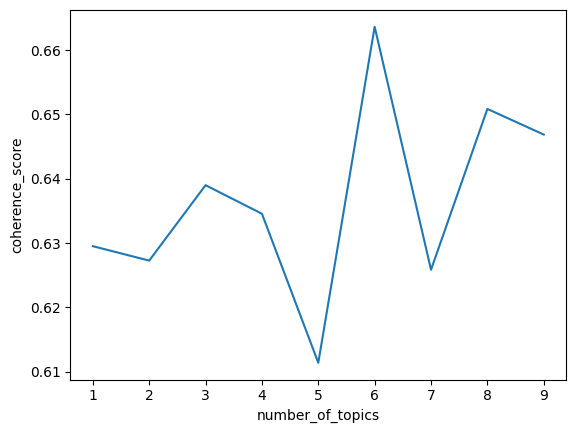

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_tech.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics
n_topics = 6

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.378*"computer" + 0.015*"account" + 0.013*"clean" + 0.010*"stuff" + 0.009*"today" + 0.009*"post" + 0.009*"days" + 0.007*"person" + 0.007*"front" + 0.007*"definitely"
Topic: 1 Word: 0.027*"people" + 0.017*"play" + 0.015*"design" + 0.015*"log" + 0.014*"decide" + 0.013*"learn" + 0.013*"fun" + 0.012*"gt" + 0.010*"authorization" + 0.010*"school"
Topic: 2 Word: 0.059*"data" + 0.037*"phone" + 0.036*"time" + 0.020*"spend" + 0.020*"program" + 0.020*"project" + 0.018*"study" + 0.016*"idea" + 0.014*"find" + 0.013*"lol"
Topic: 3 Word: 0.035*"day" + 0.022*"science" + 0.017*"keep" + 0.015*"top" + 0.015*"money" + 0.015*"engineer" + 0.013*"mine" + 0.012*"lose" + 0.012*"well" + 0.011*"understand"
Topic: 4 Word: 0.085*"science" + 0.066*"help" + 0.052*"pay" + 0.049*"write" + 0.042*"work" + 0.039*"analysis" + 0.038*"history" + 0.032*"math" + 0.031*"dm" + 0.028*"handle"
Topic: 5 Word: 0.026*"years" + 0.025*"call" + 0.025*"game" + 0.023*"ago" + 0.020*"minutes" + 0.019*"good" + 0.018*"screen"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.362776  0.040359       1        1  21.636706
2      0.065454 -0.258257       2        1  17.080073
1      0.101121  0.030577       3        1  16.424207
3     -0.001378 -0.092503       4        1  15.612856
0      0.106191  0.186004       5        1  14.793024
5      0.091387  0.093819       6        1  14.453134, topic_info=          Term        Freq       Total Category  logprob  loglift
4     computer  717.000000  717.000000  Default  30.0000  30.0000
852    science  281.000000  281.000000  Default  29.0000  29.0000
10        help  183.000000  183.000000  Default  28.0000  28.0000
242       data  128.000000  128.000000  Default  27.0000  27.0000
475        pay  145.000000  145.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
67     laptops    9.489256   10.195166   Topic6  -5.2739   1.8625
1564      gate   17.274551   20.480830   Topic6  -4.6748   1.7640
1200  identify   12.310067   15.623799   Topic6  -5.0136   1.6959
1353      wipe   10.350385   15.389080   Topic6  -5.1870   1.5376
683        dig    9.662548   11.711539   Topic6  -5.2558   1.7419

[236 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
609       2  0.954379   access
1421      5  0.985504   accord
322       5  0.966203  account
512       5  0.921121      add
1350      6  0.992263      ago
...     ...       ...      ...
143       1  0.999530     work
496       1  0.998270    write
1151      5  0.960114    wrong
97        2  0.958460     year
76        6  0.986388    years

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 4, 1, 6])

## For Cluster 3

In [ ]:
# Create Dictionary
mask = (data_tech['cluster']==2)
id2word = corpora.Dictionary(data_tech.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_tech['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

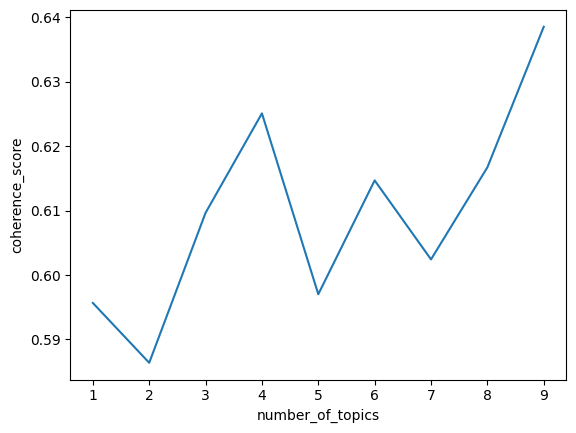

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_tech.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics
n_topics = 4

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.029*"years" + 0.028*"call" + 0.027*"game" + 0.019*"science" + 0.018*"find" + 0.017*"lol" + 0.016*"top" + 0.016*"today" + 0.015*"post" + 0.015*"guy"
Topic: 1 Word: 0.030*"ago" + 0.026*"clean" + 0.023*"idea" + 0.022*"keep" + 0.021*"stuff" + 0.019*"money" + 0.017*"start" + 0.017*"digital" + 0.014*"person" + 0.013*"piece"
Topic: 2 Word: 0.243*"computer" + 0.027*"time" + 0.024*"case" + 0.015*"program" + 0.015*"course" + 0.013*"feel" + 0.013*"minutes" + 0.012*"play" + 0.011*"business" + 0.011*"system"
Topic: 3 Word: 0.105*"computer" + 0.065*"science" + 0.049*"help" + 0.039*"pay" + 0.036*"write" + 0.036*"essay" + 0.032*"data" + 0.031*"work" + 0.028*"physics" + 0.028*"history"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.264972 -0.155724       1        1  32.937227
2      0.121513  0.233930       2        1  24.661726
0     -0.182036 -0.140643       3        1  22.872078
1     -0.204449  0.062437       4        1  19.528969, topic_info=          Term         Freq        Total Category  logprob  loglift
448   computer  1271.000000  1271.000000  Default  30.0000  30.0000
664       help   216.000000   216.000000  Default  29.0000  29.0000
9      science   347.000000   347.000000  Default  28.0000  28.0000
584        pay   171.000000   171.000000  Default  27.0000  27.0000
409      write   161.000000   161.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
487        man    17.028079    17.800105   Topic4  -5.0369   1.5889
1693      pass    26.807136    28.188601   Topic4  -4.5831   1.5830
46        fail    20.086550    21.034865   Topic4  -4.8717   1.5871
1671        pm    20.334403    21.675440   Topic4  -4.8594   1.5694
855       dont    17.619034    19.314673   Topic4  -5.0028   1.5414

[169 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1200      2  0.933212  access
34        4  0.979042  accord
331       3  0.988350     add
716       4  0.989089     ago
432       3  0.977631    base
...     ...       ...     ...
51        1  0.990345    work
409       1  0.994285   write
112       2  0.978511   wrong
227       2  0.955785    year
784       3  0.993203   years

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

## For Cluster 4

In [ ]:
# Create Dictionary
mask = (data_tech['cluster']==3)
id2word = corpora.Dictionary(data_tech.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_tech['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

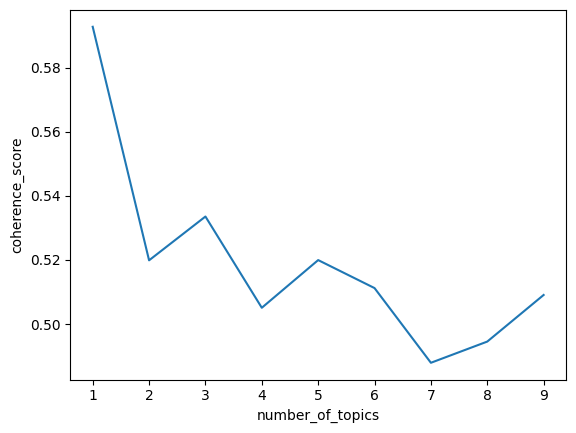

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_tech.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics
n_topics = 3

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.638*"computer" + 0.080*"work" + 0.031*"call" + 0.025*"feel" + 0.024*"good" + 0.020*"business" + 0.017*"engineer" + 0.015*"point" + 0.013*"understand" + 0.010*"music"
Topic: 1 Word: 0.321*"science" + 0.153*"write" + 0.075*"case" + 0.065*"online" + 0.046*"program" + 0.046*"course" + 0.041*"handle" + 0.024*"hand" + 0.018*"stay" + 0.018*"free"
Topic: 2 Word: 0.062*"help" + 0.049*"pay" + 0.046*"essay" + 0.040*"psychology" + 0.040*"computer" + 0.040*"data" + 0.037*"sociology" + 0.037*"analysis" + 0.036*"thesis" + 0.036*"physics"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.039893 -0.315268       1        1  53.490233
0     -0.284572  0.188610       2        1  24.933299
1      0.324465  0.126658       3        1  21.576468, topic_info=              Term        Freq       Total Category  logprob  loglift
116       computer  902.000000  902.000000  Default  30.0000  30.0000
18         science  346.000000  346.000000  Default  29.0000  29.0000
15           write  170.000000  170.000000  Default  28.0000  28.0000
73            work  100.000000  100.000000  Default  27.0000  27.0000
115           case   81.000000   81.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
118     powerpoint    6.835630   39.073090   Topic3  -5.0609  -0.2097
126        mathlab    5.994247   41.438553   Topic3  -5.1922  -0.3998
101      economics    3.798493   18.435217   Topic3  -5.6484  -0.0461
170  assignmentdue    2.032778    5.803015   Topic3  -6.2736   0.4846
91    trigonometry    2.159101   71.250314   Topic3  -6.2133  -1.9629

[142 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
22        1  0.972431       account
22        2  0.026282       account
50        1  0.292720       algebra
50        2  0.585439       algebra
110       1  0.991180      analysis
...     ...       ...           ...
91        3  0.028070  trigonometry
21        2  0.952422    understand
73        2  0.995713          work
15        1  0.029334         write
15        3  0.968013         write

[152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

## For Cluster 5

In [ ]:
# Create Dictionary
mask = (data_tech['cluster']==4)
id2word = corpora.Dictionary(data_tech.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_tech['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

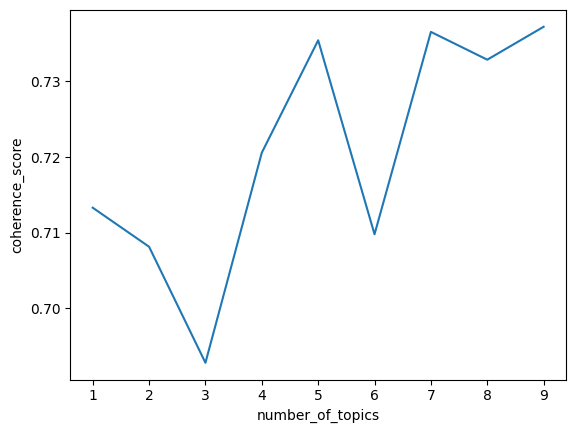

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_tech.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics
n_topics = 5

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.660*"computer" + 0.025*"program" + 0.022*"good" + 0.018*"design" + 0.018*"things" + 0.017*"screen" + 0.016*"learn" + 0.013*"school" + 0.012*"understand" + 0.011*"single"
Topic: 1 Word: 0.193*"time" + 0.087*"play" + 0.071*"lol" + 0.062*"stream" + 0.057*"send" + 0.050*"sure" + 0.047*"reason" + 0.041*"stay" + 0.039*"identify" + 0.035*"big"
Topic: 2 Word: 0.284*"data" + 0.070*"keep" + 0.061*"engineer" + 0.059*"remember" + 0.050*"lose" + 0.044*"definitely" + 0.042*"light" + 0.034*"friend" + 0.032*"set" + 0.023*"space"
Topic: 3 Word: 0.201*"work" + 0.091*"people" + 0.076*"game" + 0.068*"course" + 0.039*"digital" + 0.031*"life" + 0.029*"open" + 0.022*"matter" + 0.022*"provide" + 0.021*"hours"
Topic: 4 Word: 0.348*"pay" + 0.113*"years" + 0.052*"public" + 0.044*"piece" + 0.033*"great" + 0.023*"gift" + 0.023*"inside" + 0.023*"laptops" + 0.018*"form" + 0.018*"holiday"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.406535  0.021860       1        1  27.117289
3      0.060066 -0.278489       2        1  20.722456
1      0.109590  0.058140       3        1  17.906049
2      0.107313  0.290941       4        1  17.235458
4      0.129565 -0.092452       5        1  17.018748, topic_info=           Term        Freq       Total Category  logprob  loglift
275    computer  736.000000  736.000000  Default  30.0000  30.0000
65          pay  243.000000  243.000000  Default  29.0000  29.0000
168        data  201.000000  201.000000  Default  28.0000  28.0000
210        work  171.000000  171.000000  Default  27.0000  27.0000
22         time  142.000000  142.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
312        bush    5.199808    7.089314   Topic5  -4.9015   1.4609
314     embassy    5.199808    7.089314   Topic5  -4.9015   1.4609
316    mannings    5.199808    7.089314   Topic5  -4.9015   1.4609
318  russiagate    5.199808    7.089314   Topic5  -4.9015   1.4609
295          sd    3.378642    4.698967   Topic5  -5.3326   1.4410

[190 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
85        1  0.804192  advance
301       2  0.259736   afraid
301       3  0.519473   afraid
301       4  0.259736   afraid
301       5  0.259736   afraid
...     ...       ...      ...
36        4  0.974151      win
210       2  0.997140     work
252       3  0.504584     xbox
211       1  0.850601     yeah
37        5  0.988762    years

[193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3, 5])

# SUMMARIZATION ANALYSIS

## Cleaning the data for the summarization.

In [ ]:
#written by Gina Roh
#pd.set_option('display.max_rows', None)

data_sum_tech = pd.read_csv("/content/sample_data/techus_csv.csv")

#clean text but make it still readable.
def clean_readable(text):
  text = remove_username(text)
  text = remove_url(text)
  text = remove_emoji(text)
  text = decontraction(text)
  text = seperate_alphanumeric(text)
  text = unique_char(cont_rep_char,text)
  text = lemmatize_word(text)
  text = remove_stopwords(text)
  return text

#data cleaning
data_sum_tech['clean_tweet'] = data_sum_tech['tweet'].apply(lambda x : clean_readable(x))
#add cluster column
data_sum_tech['cluster'] = clusters
data_sum_tech

user           location  \
0      NASALaserComm      Greenbelt, MD   
1       turntidetech      Sunnyvale, CA   
2           TRUEUP90      Royal Oak, MI   
3       Parents_Nook  San Francisco, CA   
4        BlakeBeilue         Denver, CO   
...              ...                ...   
1675   aerohistorian     Cincinnati, OH   
1676          N8Talk      Cleveland, OH   
1677  joshhwesterman          Miami, FL   
1678  LuisM_Oliveira       New York, NY   
1679    AppleSupport      Cupertino, CA   

                                                  tweet  \
0     We're also at #AGU2021, representing @NASASCaN...   
1     When your technology can transform both busine...   
2     @elonmusk Will you send me a Tesla in exchange...   
3     And the best part is working on a deep problem...   
4     @daheels1 @therealdre_jack @HelmanDC Unless th...   
...                                                 ...   
1675  @CosmicBecky You can just aim a hose right thr...   
1676  The idea of taking a trip and bringing my work...   
1677  @zerohedge Sooo a mini super computer that’s 1...   
1678  I miss seeing everyone outside a computer scre...   
1679  @robinjection Hi, and thanks for reaching out ...   

                                            clean_tweet  cluster  
0     We also AGU 2021 represent share benefit laser...        0  
1     When technology transform business fight clima...        0  
2     Will send Tesla exchange theory way travel int...        0  
3     And best part work deep problem satisfy ignore...        0  
4     Unless substitute type android think real Dak ...        0  
...                                                 ...      ...  
1675  You aim hose right vent computer case You even...        1  
1676  The idea take trip bring work computer sound g...        1  
1677  Soo mini super computer 100 tangible like half...        1  
1678  I miss see everyone outside computer screen Ve...        1  
1679  Hi thank reach us We want help way Upon restar...        1  

[1680 rows x 5 columns]

In [ ]:
#written by Gina Roh
pd.set_option('display.max_colwidth',1200)

#data_sum_copy = data_sum_tech.copy()
data_sum_copy = data.copy()

#concatenate all the tweets within each cluster to form a single document for each cluster
data_sum_copy['tweet'] = data_sum_copy.groupby(['cluster'])['tweet'].transform(lambda x : '. '.join(x))
data_sum_final = data_sum_copy.drop_duplicates(subset=['tweet'])
data_sum_final

user                        location  \
0     NASALaserComm                   Greenbelt, MD   
10  Rei96234818John                  Framingham, MA   
13  Cybersecinsider                   United States   
55        LeethalMe  Mornington Peninsula, Vic, Aus   
59       soccergrly                    Florida, USA   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              tweet  \
0   agu represent share benefit laser communications scientists public. transform business fight climate change tend notice recognition feel good innovation sustainability turnthetide. send tesla exchange theory travel interstellar. best work deep problem satisfy ignore community work solve problem help satisfy life work guess. substitute type android real dak play week advance days. great prioritize customer service american people executive order government agencies leverage deliver user friendly secure customer experience americans cx. talk bias watch preview americanauto. sibannac pursue patent identify products consumer brand drnk snnc. years worth memories unlock. exquisite real life amaze eye gaze. artist instagram account ametaverse document life work decade shut facebook change company meta wipe work internet metaverse art. long phone water mins captain finally find work. david marcus fully implement super excite horizonshops horizonmalls horizonnft horizonworlds horizoncommunity metaverse unc metaverseeconomy untamednorth horizoncreators metaversenews. cios spend months adapt change deliver solutions scale prioritize time energy combat challenge leadership vision key prio...   
10  roe happen medical sonograms high image roe happen laws regard medical issue update. humans curse fear evidence existence general high average live better keep roll dice better bet. nasa newest ray observatory rocket orbit thursday light explode star black hole violent high energy events unfold universe abc news detail science space exploration. nasa newest ray observatory rocket orbit thursday light explode star black hole violent high energy events unfold universe abc news detail science space. high filter reason hologram listen podcast talk conspiracy bomber hologram shoot second tower real hologram tweet lol. final boys varsity basketball bartow high school yellow jacket defeat mckeel academy wildcats scorestream. bartow boys varsity basketball bartow high school yellow jacket lead mckeel academy wildcats quarter scorestream. nasa newest ray observatory rocket orbit thursday light explode star black hole violent high energy events unfold universe abc news detail science space. nasa newest ray observatory rocket orbit thursday light explode star black hole violent high energy events unfold universe abc news detail science space exploration. apple team boys girls club atlanti...   
13  whitepaper mitre att ck framework source cybersecurity. sec

## Using SUMY and Lexrank summarizer for summarizing the top tweets

In [ ]:
#written by Gina Roh
import textwrap
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

print("LexRank")
for i in range(5):
  print ("----------")
  print ("Cluster %d:" % i)
  document1 = data_sum_final.loc[data_sum_final['cluster'].eq(i), 'tweet'].astype(str)
  document1 = str(document1)[4:].strip()
  parser = PlaintextParser.from_string(document1,Tokenizer("english"))

  #using LexRank
  summarizer = LexRankSummarizer()
  #summarize the document with seven sentence
  summary = summarizer(parser.document, 7)

  #The first five unduplicated sentences are printed
  num = 0
  sum_result = []
  for sentence in summary:
    if str(sentence) not in sum_result:
      sum_result.append(str(sentence))
      num += 1
    if num == 5:
      break

  # Wrap this text
  wrapper = textwrap.TextWrapper(width=100)
  word_list = wrapper.wrap(text=" ".join(sum_result))

  # Print each line
  for element in word_list:
      print(element)

LexRank
----------
Cluster 0:
agu represent share benefit laser communications scientists public. transform business fight climate
change tend notice recognition feel good innovation sustainability turnthetide. send tesla exchange
theory travel interstellar. best work deep problem satisfy ignore community work solve problem help
satisfy life work guess. substitute type android real dak play week advance days.
----------
Cluster 1:
imply china forget keep copy hear birth certificate hear computer help chavez elect exist hear vote.
horrible surprise hear consider typical knowledge gap generations computer weird ass effort creep
child. quote call dr el hayek lebanese ignorant premise germany mongol khazars speak hebrew german
moron fall computer israeli investigate complicate. cookie terrible kid move computer daughter
scrappy hacker digital implant hair dad untraceable free hand punch. pop staple correction tape
browse laptops fun convo computer brand years agreement hps suck toshiba son

## Using Luhn summarizer for summarizing the top tweets

In [ ]:
#written by Gina Roh
from sumy.summarizers.luhn import LuhnSummarizer

print("Luhn")
for i in range(5):
  print ("----------")
  print ("Cluster %d:" % i)
  document1 = data_sum_final.loc[data_sum_final['cluster'].eq(i), 'tweet'].astype(str)
  document1 = str(document1)[4:].strip()
  parser = PlaintextParser.from_string(document1,Tokenizer("english"))

  #using Luhn
  summarizer_luhn = LuhnSummarizer()
  #summarize the document with seven sentence
  summary_l =summarizer_luhn(parser.document,7)

  #The first five unduplicated sentences are printed
  num = 0
  sum_result = []
  for sentence in summary_l:
    if str(sentence) not in sum_result:
      sum_result.append(str(sentence))
      num += 1
    if num == 5:
      break

  # Wrap this text
  wrapper = textwrap.TextWrapper(width=100)
  word_list = wrapper.wrap(text=" ".join(sum_result))

  # Print each line
  for element in word_list:
      print(element)

Luhn
----------
Cluster 0:
agu represent share benefit laser communications scientists public. transform business fight climate
change tend notice recognition feel good innovation sustainability turnthetide. best work deep
problem satisfy ignore community work solve problem help satisfy life work guess. great prioritize
customer service american people executive order government agencies leverage deliver user friendly
secure customer experience americans cx. exquisite real life amaze eye gaze.
----------
Cluster 1:
imply china forget keep copy hear birth certificate hear computer help chavez elect exist hear vote.
horrible surprise hear consider typical knowledge gap generations computer weird ass effort creep
child. finals clarify drama final tm english wendsday math computer science thursday. clear people
understand computer science concepts algorithms easier effective ways gain insight experience entail
contrive cod interview. hold computer science engineer university california san

## Both the summarizers gave similar results and we have used both to compare with the normal summarizer and get insights for the same.

In [ ]:
#make panda's max_cowidth setting back
pd.set_option('display.max_colwidth',100)